<a href="https://colab.research.google.com/github/ysamokhotov/yandex-praktikum-projects/blob/main/%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F%20%D0%BF%D0%BE%D0%BA%D1%83%D0%BF%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9%20e-commerce%20%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0%20'%D0%9F%D0%BE%D0%BA%D0%B0%20%D0%B2%D1%81%D0%B5%20%D0%B5%D1%89%D0%B5%20%D1%82%D1%83%D1%82'/%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D0%BE%D0%BA%D1%83%D0%BF%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_e_commerce_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0_'%D0%9F%D0%BE%D0%BA%D0%B0_%D0%B2%D1%81%D0%B5_%D0%B5%D1%89%D0%B5_%D1%82%D1%83%D1%82'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**План работы:**

1) [Импорт библиотек](#1)

2) [Предобработка](#2)

* приведем данные в нужный формат
* проверим наличие дубликатов
* проверим и примем решение относительно пропусков
* посмотрим на распределение признаков
* проведем кластеризацию товарных наименований

3) [Исследовательский анализ](#3)

* исследуем ассортимент, определим количество и долю каждой категории
* определим самые продаваемые и прибыльные категории товаров
* определим средний чек и его динамику
* определим среднюю выручку с покупателя и ее динамику
* определим динамику выручки
* определим среднее количество товарных позиций в заказах
* проверим в какое время больше всего заказов
* проверим в какой день недели больше всего заказов
* посмотрим на распределение количества покупателей по месяцам
* посмотрим на распределение количества заказов по месяцам

4) [Сегментирование покупателей](#4)

* по интересующим категориям товаров
* по количеству товаров в заказе
* по возвращаемости (мера измерения - месяц)
* по LTV

5) [Формулирование и проверка гипотез](#5)

* равный средний чек между группами
* равная доля возвращаемости или вероятность того, что случайный клиент "проживет" с магазином дольше (мера измерения - месяц)

6) [Выводы и предложения по увеличению среднего чека для каждой группы пользователей](#6)

7) [Оформить презентацию по результатам исследования](#7)

8) [Сделать дашборд отражающий](#8)

* диаграмму количества покупок по дням
* индикатор количества покупателей
* фильтр дашборда по дате совершения покупки

 [**Презентация**](https://drive.google.com/file/d/1jePrplrOtpRtRfLgRzfJ6xboUAVm4ETL/view?usp=share_link)<a id=7></a>

[**Дашборд (динамика количества заказов по дням)**](https://public.tableau.com/app/profile/george5994/viz/E-commercedashboardset1/Dashboard?publish=yes)<a id=8></a>

# Импорт библиотек<a id=1></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
import pylab
from tqdm.notebook import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
try:
    path = 'gdrive/My Drive/Colab Notebooks/ЯП/Проекты/df/' 
    df = pd.read_csv(path + 'ecommerce_dataset.csv')
except:
    df = pd.read_csv('/datasets/ecommerce_dataset.csv')

# Предобработка<a id=2></a>

In [ ]:
pd.options.display.max_colwidth = 100

Посмотрим первые 5 строк датасета.

In [ ]:
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Посмотрим общую информацию о датасете.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [ ]:
df.columns = ['dt_time', 'customer_id', 'order_id', 'product', 'quantity', 'price']

Приведем дату к формату datetime.

In [ ]:
df['dt_time'] = pd.to_datetime(df['dt_time'], format='%Y%m%d%H')

Подготовим дополнительные столбцы с датой без времени, с временем, месяцем и днем недели для дальнейшего изучения

In [ ]:
df['dt'] = pd.to_datetime(df['dt_time'].dt.date)
df['time'] = df['dt_time'].dt.time
df['month'] = df['dt_time'].dt.to_period('m')
df['dayofweek'] = df['dt_time'].dt.dayofweek

Добавим колонку с суммарной выручкой.

In [ ]:
df['revenue'] = df['quantity'] * df['price']

Посчитаем количество клиентов и заказов в оригинальном датасете.

In [ ]:
print('Количество клиентов:',df['customer_id'].nunique())
print('Количество заказов:',df['order_id'].nunique())

Количество клиентов: 2451
Количество заказов: 2784


**Проверим наличие дубликатов.**

In [ ]:
df.duplicated().sum()

0

*Явных дубликатов нет.*

**Проверим неявные дубликаты - заказы, которые относятся сразу к нескольким клиентам.**

In [ ]:
t = df.groupby('order_id')['customer_id'].nunique().sort_values(ascending=False).reset_index()
t[t['customer_id'] > 1]['order_id']

0     72845
1     71480
2     69485
3     69310
4     69833
5     72790
6     72778
7     14872
8     71542
9     71054
10    71663
11    70726
12    69531
13    70542
14    70903
15    69283
16    71226
17    71571
18    69410
19    69345
20    70808
21    70114
22    70631
23    71461
24    72950
25    71648
26    70946
27    68785
28    72188
Name: order_id, dtype: int64

**Проверим различия в составе таких заказов (артикул и количество) и выведем True, если они совпадают.**

In [ ]:
res = []
for order in df[df['order_id'].isin(t[t['customer_id'] > 1]['order_id'])]['order_id'].unique():
    if df[df['order_id'] == order]['product'].nunique() == 1 \
    and df[df['order_id'] == order]['quantity'].nunique() == 1:
        res.append([order, True])
    else:
        res.append([order, False])

In [ ]:
res

[[68785, True],
 [69283, True],
 [69310, True],
 [69345, True],
 [69410, True],
 [69485, False],
 [69531, True],
 [69833, True],
 [70114, True],
 [70542, True],
 [70631, True],
 [70726, True],
 [70808, True],
 [70903, True],
 [70946, True],
 [71054, True],
 [71226, True],
 [71461, True],
 [71480, True],
 [71542, True],
 [71571, True],
 [71648, True],
 [71663, True],
 [14872, False],
 [72188, True],
 [72778, True],
 [72790, True],
 [72845, True],
 [72950, True]]

*29 номеров заказов относятся сразу к нескольким пользователям. Из них в двух разный список товаров. Скорее всего, есть какая-то ошибка в логировании. Возможно, это незарегестрированные пользователи, которые забывают о товаре в корзине, а потом возвращаются в другой сессии с другим customer id. Доля таких заказов - 1% и доля от суммарной выручки - 2,5%. Удалим их из датасета.*

In [ ]:
df.drop(df[df['order_id'].isin(t[t['customer_id'] > 1]['order_id'])].index, 
        axis=0, inplace=True)

**Проверим дубликаты без учета столбцов с датой и временем.**

In [ ]:
df[['customer_id', 'order_id', 'product', 'quantity', 'price',
       'revenue']].duplicated().sum()

1841

*Скорее всего также ошибка логирования, удалим дубликаты, оставив только первые по времени строки.*

In [ ]:
df = df.sort_values('dt_time').drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price',
       'revenue'], keep='first')

**Проверим нет ли у одного заказа несколько дат.**

In [ ]:
t = df.groupby('order_id')

In [ ]:
df[df.index.isin(t.filter(lambda x: x['dt_time'].nunique() > 1).index)]['order_id'].nunique()

23

*У данных заказов разный состав и дата, но один номер, мы не знаем, в чем ошибка - в номере заказа или во времени, поэтому также удалим эти 23 заказа.*

In [ ]:
df.drop(df[df.index.isin(t.filter(lambda x: x['dt_time'].nunique() > 1).index)].index, axis=0, inplace=True)

In [ ]:
df['customer_id'].nunique()

2375

In [ ]:
print('Количество клиентов после удаления дубликатов:',
      df['customer_id'].nunique(),' - оставшаяся доля от оригинального датасета:',
      round((df['customer_id'].nunique()/2451),2))
print('Количество заказов после удаления дубликатов:',
      df['order_id'].nunique(),'- оставшаяся доля от оригинального датасета:',
      round((df['order_id'].nunique()/2784),2))

Количество клиентов после удаления дубликатов: 2375  - оставшаяся доля от оригинального датасета: 0.97
Количество заказов после удаления дубликатов: 2732 - оставшаяся доля от оригинального датасета: 0.98


Проверим наличие пропусков.

In [ ]:
numbers_of_nulls = pd.DataFrame(columns=['names'], data=df.columns)
numbers_of_nulls['nulls'] = df.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/df.shape[0]
numbers_of_nulls

,names,nulls,nulls_percent
0,dt_time,0,0.0
1,customer_id,0,0.0
2,order_id,0,0.0
3,product,0,0.0
4,quantity,0,0.0
5,price,0,0.0
6,dt,0,0.0
7,time,0,0.0
8,month,0,0.0
9,dayofweek,0,0.0


*Пропусков нет.*

Проведем кластеризацию товарных наименований.

In [ ]:
# создаем категорию с видами домашних растений
home_flowers = ['Лавр','Ледебурия','Леея','Маранта','Мирт','Монстера','Мюленбекия',
                'Нандина','Непентес','Нертера','Оплисменус','Осока','Офиопогон',
                'Палисота','Панданус','Паслён','Пахира','Пеллиония','Пеперомия',
                'Перец','Пизония','Пилея','Плектрантус','Плющ','Погонатерум','Полисциас',
                'Псевдоэрантемум','Радермахера','Рео','Родея','Розмарин','Руэллия',
                'Саговник','Цикас','Сансевиерия','Сауроматум','Арум','Селагинелла',
                'Сеткрезия','Сидерасис','Сингониум','Солейролия','Спатифиллюм',
                'Строманта','Сциндапсус','Тетрастигма','Традесканция','Фатсия',
                'Фатсхедера','Фикус','Филодендрон','Фиттония','Хлорофитум','Хойя',
                'Цианотис','Циперус','Циссус','Шеффлера','Энцефаляртос','Эпипремнум',
                'Эписция','Абутилон','Агапантус','Азалия','Алламанда','Амариллис',
                'Афеландра','Ахименес','Бегония','Белопероне','Броваллия','Брунфельсия',
                'Бувардия','Бугенвилия','Валлота','Циртантус','Вельтгеймия','Гардения',
                'Гемантус','Гербера','Гибискус','Гименокаллис','Гипоцирта','Гиппеаструм',
                'Глоксиния','Синнингия','Глориоза','Гортензия','Гофмания','Дурман',
                'Датура','Жасмин','Зефирантес','Иксора','Импатиенс','Бальзамин',
                'Калина','Калла','Зантедеския','Каллистемон','Кальцеолярия','Камелия',
                'Катарантус','Клеродендрум','Кливия','Колерия','Колокольчик','Колумнея',
                'Кринум','Кроссандра','Куфея','Лантана','Лириопе','Мандевилла','Дипладения',
                'Мединилла','Муррайя','Нематантус','Нерине','Олеандр','Пассифлора',
                'Страстоцвет','Пахистахис','Педилантус','Пеларгония','Пентас','Плюмбаго',
                'Свинчатка','Примула','Рейхстейнерия','Санхеция','Сенполия','Смитианта',
                'Спармания','Спрекелия','Стефанотис','Стрелитция','Стрептокарпус',
                'Стробилянт','Тунбергия','Фиалка','Фуксия','Хебе','Цикламен','Дряква',
                'Экзакум','Эсхинантус','Эухарис','Якобиния','Комнатное','Адиантум',
                'Анемия','Блехнум','Даваллия','Дидимохлена','Костенец','Асплениум',
                'Лигодиум','Листовик','Нефролепис','Пеллея','Платицериум','Птерис',
                'Флебодиум','Циртомиум','Бромелиевые','Фризея','Ананас','Бильбергия',
                'Фризея','Вриезия','Гехтия','Гусмания','Диккия','Криптантус','Неорегелия',
                'Нидуляриум','Тилландсия','Фасикулярия двуцветная','Эхмея','Арека',
                'Брахея','Эритея','Бутия','Вашингтония','Гиофорба','Кариота','Кокос',
                'Латания','Ливистона','Ликуала','Притчардия','Рапис','Трахикарпус',
                'Финик','Хамедорея','Кентия','Хамеропс','Ховея','Хризалидокарпус',
                'Юбея','Гибридный фаленопсис','Аскоценда','Бифренария','Брассавола',
                'Брассия','Брассокаттлея','Ванда','Дендробиум','Зигопеталюм','Каттлея',
                'Лелия','Ликасте','Людизия','Гемария','Мильтония','Одонтоглоссум',
                'Онцидиум','Пафиопедилюм','Плейоне','Фаленопсис','Целогина','Цимбидиум',
                'Астрофитум','Апорокактус','Гатиора','Гимнокалициум','Дизокактус',
                'Клейстокактус','Корифанта','Лейхтенбергия','Лофофора','Маммиллярия',
                'Мелокактус','Опунция','Ореоцереус','Пародия','Переския','Пилозоцереус',
                'Ребуция','Рипсалис','Селеницереус','Стенокактус','Стетсония','Телокактус',
                'Ферокактус','Хагеоцереус','Цереус','Цефалоцереус','Шлюмбергера',
                'Эпифиллум','Эспостоа','Эхинокактус','Эхинопсис','Эхиноцереус','Юкка',
                'Адениум','Алоэ','Аргиродерма','Брахихитон','Гастерия','Гуерния','Каланхоэ',
                'Котиледон','Крестовник','Литопс','Молочай','Нолина','Очиток','Пахиподиум',
                'Пахифитум','Портулакария','Синадениум','Стапелия','Толстянка','Фаукария',
                'Хавортия','Церопегия','Эониум','Эхеверия','Юкка','Ятрофа','Гранат',
                'Кофе','Персея','Авокадо','Фейхоа','Акка','Фикус','Инжир','Герань',
                'Хризолидокарпус','Мимоза', 'Каланхое', 'Суккулент', 'Эвкалипт',
                'Петуния', 'Бакопа', 'Калибрахоа', 'Лобелия','Вербейник', 'Мята',
                'Вербена','Декабрист','Овсянница','Барвинок', 'Ясколка','Лаванда',
                'Базилик','Флокс','Антуриум Тропик Найт','Роза кустовая','Роза одноголовая',
                'Коника', 'Элвуди ','Афеляндра', 'растение']

In [ ]:
# размечаем названия товаров
df['cat'] = ['Товары для дома и дачи' if (re.compile(r'(?i)\bплед\b').search(x)
                or re.compile(r'(?i)\bковрик\b').search(x)
                or re.compile(r'(?i)\bвкладыши\b').search(x)
                or re.compile(r'(?i)\bbобув\w+\b').search(x)
                or re.compile(r'(?i)\bтермометр\b').search(x)
                or re.compile(r'(?i)\bковёр\b').search(x)
                or re.compile(r'(?i)\brozenbal\b').search(x)
                or re.compile(r'(?i)\bящик\b').search(x)
                or re.compile(r'(?i)\bпуф\b').search(x)
                or re.compile(r'(?i)\bсетка для\b').search(x)
                or re.compile(r'(?i)\bэтажерка\b').search(x)
                or re.compile(r'(?i)\bподголовник\b').search(x)
                or re.compile(r'(?i)\bстеллаж\b').search(x)
                or re.compile(r'(?i)\bмуляж\b').search(x)
                or re.compile(r'(?i)\bкороб стеллажный\b').search(x)
                or re.compile(r'(?i)\bвесы\b').search(x)
                or re.compile(r'(?i)\bбензин\b').search(x)
                or re.compile(r'(?i)\bнабор ковров\b').search(x)
                or re.compile(r'(?i)\bролик\b').search(x)
                or re.compile(r'(?i)\bхлопок\b').search(x)
                or re.compile(r'(?i)\bщетка\b').search(x)
                or re.compile(r'(?i)\bщётка\b').search(x)
                or re.compile(r'(?i)\bковер\b').search(x)
                or re.compile(r'(?i)\bскребок\b').search(x)
                or re.compile(r'(?i)\bобувница\b').search(x)
                or re.compile(r'(?i)\bведр\w+\b').search(x)
                or re.compile(r'(?i)\bвешал\w+\b').search(x)
                or re.compile(r'(?i)\bприщеп\w+\b').search(x)
                or re.compile(r'(?i)\bподставка\b').search(x)
                or re.compile(r'(?i)\bдля туалета\b').search(x)            
                or re.compile(r'(?i)\bполотенце\b').search(x)
                or re.compile(r'(?i)\bштора\b').search(x)
                or re.compile(r'(?i)\bкоробка\b').search(x)
                or re.compile(r'(?i)\bнасадка\b').search(x)
                or re.compile(r'(?i)\bдля стирки\b').search(x)
                or re.compile(r'(?i)\bковш\b').search(x)
                or re.compile(r'(?i)\bмасленка\b').search(x)
                or re.compile(r'(?i)\bскатерть\b').search(x)
                or re.compile(r'(?i)\bурна\b').search(x)
                or re.compile(r'(?i)\bваза\b').search(x)
                or re.compile(r'(?i)\bдозатор для мыла\b').search(x)
                or re.compile(r'(?i)\bунитазн\w+\b').search(x)
                or re.compile(r'(?i)\bкорыто\b').search(x)
                or re.compile(r'(?i)\bхранения\b').search(x)
                or re.compile(r'(?i)\bщетк\w+\b').search(x) 
                or re.compile(r'(?i)\bкорзин\w+\b').search(x)
                or re.compile(r'(?i)\bсушилк\w+\b').search(x)
                or re.compile(r'(?i)\bодеяло\b').search(x)
                or re.compile(r'(?i)\bкрючок\b').search(x)
                or re.compile(r'(?i)\bпостельного\b').search(x)
                or re.compile(r'(?i)\bпокрывало\b').search(x)
                or re.compile(r'(?i)\bплечики\b').search(x)
                or re.compile(r'(?i)\bрассекатель\b').search(x)
                or re.compile(r'(?i)\bмыльница\b').search(x)
                or re.compile(r'(?i)\bфоторамка\b').search(x)
                or re.compile(r'(?i)\bпьезозажигалка\b').search(x)
                or re.compile(r'(?i)\bокномойка\b').search(x)
                or re.compile(r'(?i)\bшвабр\w+\b').search(x)
                or re.compile(r'(?i)\bёрш\b').search(x)
                or re.compile(r'(?i)\bерш\b').search(x)
                or re.compile(r'(?i)\bгубка\b').search(x)
                or re.compile(r'(?i)\bхалат\b').search(x)
                or re.compile(r'(?i)\bкофр\b').search(x)
                or re.compile(r'(?i)\bконтейнер\b').search(x)
                or re.compile(r'(?i)\bштанга для ванной\b').search(x)
                or re.compile(r'(?i)\bсиденье\b').search(x)
                or re.compile(r'(?i)\bтряпкодержатель\b').search(x)
                or re.compile(r'(?i)\bвантуз\b').search(x)
                or re.compile(r'(?i)\bтуалетной\b').search(x)
                or re.compile(r'(?i)\bсалфет\w+\b').search(x)
                or re.compile(r'(?i)\bперчатки\b').search(x)
                or re.compile(r'(?i)\bткань\b').search(x)
                or re.compile(r'(?i)\bвеник\b').search(x)
                or re.compile(r'(?i)\bтаз\b').search(x) 
                or re.compile(r'(?i)\bкольца для штор\b').search(x) 
                or re.compile(r'(?i)\bделикатной\b').search(x) 
                or re.compile(r'(?i)\bпробка\b').search(x)
                or re.compile(r'(?i)\bподушка\b').search(x)
                or re.compile(r'(?i)\bсметка\b').search(x)
                or re.compile(r'(?i)\bключница\b').search(x)
                or re.compile(r'(?i)\bкомод\b').search(x)
                or re.compile(r'(?i)\bчехол\b').search(x) 
                or re.compile(r'(?i)\bдекоративн\w+\b').search(x)
                or re.compile(r'(?i)\bлист клена\b').search(x)
                or re.compile(r'(?i)\bцветок искусственный\b').search(x)
                or re.compile(r'(?i)\bискусственная композиция\b').search(x)
                or re.compile(r'(?i)\bискусственный цветок\b').search(x)
                or re.compile(r'(?i)\bпылесос\b').search(x)
                or re.compile(r'(?i)\bфен\b').search(x)
                or re.compile(r'(?i)\bутюг\b').search(x)
                or re.compile(r'(?i)\bсветильник\b').search(x)
                or re.compile(r'(?i)\bгладильн\w+\b').search(x)
                or re.compile(r'(?i)\bподрукавник\b').search(x)
                or re.compile(r'(?i)\bсредство\b').search(x)
                or re.compile(r'(?i)\bополаскиватель\b').search(x)
                or re.compile(r'(?i)\bпорошок\b').search(x)
                or re.compile(r'(?i)\bкондиционер\b').search(x)
                or re.compile(r'(?i)\bдля белья\b').search(x)
                or re.compile(r'(?i)\bантижир\b').search(x)
                or re.compile(r'(?i)\bбелья\b').search(x)
                or re.compile(r'(?i)\bпятен\b').search(x)
                or re.compile(r'(?i)\bантинакипин\b').search(x)
                or re.compile(r'(?i)\bпосудомоечных\b').search(x)
                or re.compile(r'(?i)\bпена\b').search(x)
                or re.compile(r'(?i)\bотбеливатель\b').search(x)
                or re.compile(r'(?i)\bзубная\b').search(x)
                or re.compile(r'(?i)\bмыло\b').search(x)
                or re.compile(r'(?i)\bмаска\b').search(x))
                
             else 'Кухонная утварь' if (re.compile(r'(?i)\bсковород\w+\b').search(x) 
                or re.compile(r'(?i)\bчайник эмалированный\b').search(x) 
                or re.compile(r'(?i)\bчайник заварочный\b').search(x) 
                or re.compile(r'(?i)\bчайник со свистком\b').search(x) 
                or re.compile(r'(?i)\bтарелка\b').search(x) 
                or re.compile(r'(?i)\bразделочная\b').search(x)
                or re.compile(r'(?i)\bчеснока\b').search(x) 
                or re.compile(r'(?i)\bножеточка\b').search(x)
                or re.compile(r'(?i)\bрыбочистка\b').search(x)
                or re.compile(r'(?i)\bсахарница\b').search(x) 
                or re.compile(r'(?i)\bхлебница\b').search(x)
                or re.compile(r'(?i)\bблюдце\b').search(x) 
                or re.compile(r'(?i)\bформа\b').search(x) 
                or re.compile(r'(?i)\bлопатка\b').search(x) 
                or re.compile(r'(?i)\bкотел\b').search(x) 
                or re.compile(r'(?i)\bкружек\b').search(x)
                or re.compile(r'(?i)\bотделитель\b').search(x)
                or re.compile(r'(?i)\bорехоколка\b').search(x)
                or re.compile(r'(?i)\bбульонница\b').search(x)
                or re.compile(r'(?i)\bемкость\b').search(x)
                or re.compile(r'(?i)\bсалфетка\b').search(x) 
                or re.compile(r'(?i)\bэмалированных салатников\b').search(x)
                or re.compile(r'(?i)\bкувшин\b').search(x)
                or re.compile(r'(?i)\bбидон\b').search(x)
                or re.compile(r'(?i)\bпосуды\b').search(x)
                or re.compile(r'(?i)\bсотейник\b').search(x)
                or re.compile(r'(?i)\bпротивень\b').search(x)
                or re.compile(r'(?i)\bкрышка\b').search(x)
                or re.compile(r'(?i)\bсовок\b').search(x)
                or re.compile(r'(?i)\bскалка\b').search(x)
                or re.compile(r'(?i)\bсалатник\b').search(x) 
                or re.compile(r'(?i)\bчашка\b').search(x)
                or re.compile(r'(?i)\b\w+кружк\w+\b').search(x)
                or re.compile(r'(?i)\bнож\b').search(x)
                or re.compile(r'(?i)\bкартофелемялка\b').search(x)
                or re.compile(r'(?i)\bвенчик\b').search(x)
                or re.compile(r'(?i)\bножей\b').search(x)
                or re.compile(r'(?i)\bнабор столовых приборов\b').search(x)
                or re.compile(r'(?i)\bвилка\b').search(x)
                or re.compile(r'(?i)\bкружка\b').search(x)
                or re.compile(r'(?i)\balpenkok\b').search(x)
                or re.compile(r'(?i)\bпросеиватель\b').search(x)
                or re.compile(r'(?i)\bбанка\b').search(x)
                or re.compile(r'(?i)\bподставка для яйца\b').search(x)
                or re.compile(r'(?i)\bстакан\b').search(x)
                or re.compile(r'(?i)\bовощечистка\b').search(x)
                or re.compile(r'(?i)\bтолкушка\b').search(x)
                or re.compile(r'(?i)\bтермос\b').search(x)
                or re.compile(r'(?i)\bразделочная доска\b').search(x)
                or re.compile(r'(?i)\bстакан\w+\b').search(x)
                or re.compile(r'(?i)\bкастрюля\b').search(x)
                or re.compile(r'(?i)\bмиска\b').search(x)
                or re.compile(r'(?i)\bwebber\b').search(x)
                or re.compile(r'(?i)\bмиксер\b').search(x)
                or re.compile(r'(?i)\bcurver\b').search(x)
                or re.compile(r'(?i)\bблюдо\b').search(x)
                or re.compile(r'(?i)\bкипятильник\b').search(x)
                or re.compile(r'(?i)\bполовник\b').search(x)
                or re.compile(r'(?i)\bбокал\w+\b').search(x)
                or re.compile(r'(?i)\bлоток\b').search(x)
                or re.compile(r'(?i)\bфужер\w+\b').search(x)
                or re.compile(r'(?i)\bовощеварка\b').search(x)
                or re.compile(r'(?i)\bтерка\b').search(x)
                or re.compile(r'(?i)\bчайный набор\b').search(x)
                or re.compile(r'(?i)\bчайник электрический\b').search(x)
                or re.compile(r'(?i)\bложка\b').search(x)
                or re.compile(r'(?i)\bсоковыжималка\b').search(x)
                or re.compile(r'(?i)\bсоковарка\b').search(x)
                or re.compile(r'(?i)\bмантоварка\b').search(x)
                or re.compile(r'(?i)\bэлектроштопор\b').search(x)
                or re.compile(r'(?i)\bизмельчитель\b').search(x)
                or re.compile(r'(?i)\bподарочн\w+\b').search(x)
                or re.compile(r'(?i)\bновогодн\w+\b').search(x))
             
              else 'Комнатные растения, семена и рассада' if (re.compile(r'^томата').search(x)
                or re.compile(r'(?i)\bукроп\b').search(x)
                or re.compile(r'(?i)\bгвоздика турецкая\b').search(x)
                or re.compile(r'(?i)\bтюльпан louvre\b').search(x)
                or re.compile(r'(?i)^космея\b').search(x)
                or re.compile(r'(?i)\bлапчатка огненное пламя\b').search(x)
                or re.compile(r'(?i)\bнастурция\b').search(x)
                or re.compile(r'(?i)\bсалат\b').search(x)
                or re.compile(r'(?i)\bцинния\b').search(x)
                or re.compile(r'(?i)\bкалендула\b').search(x)
                or re.compile(r'(?i)\bгеоргина черная красавица\b').search(x)
                or re.compile(r'(?i)\bгиностемма\b').search(x)
                or re.compile(r'(?i)\bкодонанта\b').search(x)
                or re.compile(r'(?i)\bморковь\b').search(x)
                or re.compile(r'(?i)\bсмолевка\b').search(x)
                or re.compile(r'(?i)\bпетрушка итальянский\b').search(x)
                or re.compile(r'(?i)\bземляника барон\b').search(x)
                or re.compile(r'[0-0.99],[0-9]\b г\b').search(x)
                or re.compile(r'(?i)\bштук в упаковке\b').search(x) 
                or re.compile(r'(?i)\bрассада\b').search(x) 
                or re.compile(r'(?i)\bв кассете\b').search(x)
                or re.compile(r'(?i)\bобъем\b').search(x)
                or re.compile(r'(?i)\bосина\b').search(x)
                or re.compile(r'(?i)\bарбуз волгоградец\b').search(x)
                or re.compile(r'(?i)\bдыня симпатия\b').search(x)
                or re.compile(r'(?i)\bдыня млада\b').search(x)
                or re.compile(r'(?i)\bкрым\b').search(x)
                or re.compile('|'.join(home_flowers)).search(x) 
                or re.compile(r'(?i)\bв горшке\b').search(x)
                or re.compile(r'(?i)\bd- [0-9]+\b').search(x)
                or re.compile(r'(?i)\bd-[0-9]+\b').search(x))

            else 'Ремонт' if (re.compile(r'(?i)\bполк\w+\b').search(x) 
                or re.compile(r'(?i)\bстремянк\w+\b').search(x)
                or re.compile(r'(?i)\bинструмен\w+\b').search(x)
                or re.compile(r'(?i)\bстяжка оконная\b').search(x)            
                or re.compile(r'(?i)\bшило\b').search(x)
                or re.compile(r'(?i)\bшпингалет\b').search(x)
                or re.compile(r'(?i)\bрешетка\b').search(x)
                or re.compile(r'(?i)\bзавертка\b').search(x)
                or re.compile(r'(?i)\bуголок\b').search(x)
                or re.compile(r'(?i)\bстроительного\b').search(x)
                or re.compile(r'(?i)\bштангенциркуль\b').search(x)
                or re.compile(r'(?i)\bфал\b').search(x)
                or re.compile(r'(?i)\bпружина\b').search(x)
                or re.compile(r'(?i)\bнабор сверел\b').search(x)
                or re.compile(r'(?i)\bкарниз\b').search(x)
                or re.compile(r'(?i)\bполировки\b').search(x)
                or re.compile(r'(?i)\bванна 70\b').search(x)
                or re.compile(r'(?i)\bпетля\b').search(x)
                or re.compile(r'(?i)\bкрепеж\b').search(x)
                or re.compile(r'(?i)\bфиксатор\b').search(x)
                or re.compile(r'(?i)\bсверло\b').search(x)
                or re.compile(r'(?i)\btruper\b').search(x)
                or re.compile(r'(?i)\bшнур\b').search(x)
                or re.compile(r'(?i)\bсварка\b').search(x)
                or re.compile(r'(?i)\bоснование для пробки\b').search(x)
                or re.compile(r'(?i)\bверевка\b').search(x)
                or re.compile(r'(?i)\bскоба\b').search(x)
                or re.compile(r'(?i)\bшпагат\b').search(x)
                or re.compile(r'(?i)\bкольцо\b').search(x)
                or re.compile(r'(?i)\bсумк\w+\b').search(x)
                or re.compile(r'(?i)\bтележ\w+\b').search(x))
           
            else 'others' for x in df['product']]

Посмотрим какое получилось распределение.

In [ ]:
df['cat'].value_counts()

Комнатные растения, семена и рассада    2404
Товары для дома и дачи                  1506
Ремонт                                   468
Кухонная утварь                          335
Name: cat, dtype: int64

In [ ]:
df['dt'].agg(['min','max'])

min   2018-10-01
max   2019-10-31
Name: dt, dtype: datetime64[ns]

*В датасете предствален период в 13 месяцев.*

Посмотрим распределение признаков: количество и выручка.

In [ ]:
df[['quantity', 'revenue']].describe()

,quantity,revenue
count,4713.000000,4713.000000
mean,2.825801,860.181837
std,17.850219,9971.252240
min,1.000000,9.000000
25%,1.000000,120.000000
50%,1.000000,194.000000
75%,1.000000,734.000000
max,1000.000000,675000.000000


*В переменных количество и выручка есть аномалии, скорее всего присутствуют заказы на очень дорогой товар, либо оптовые закупки. Посмотрим на распределение ниже.*

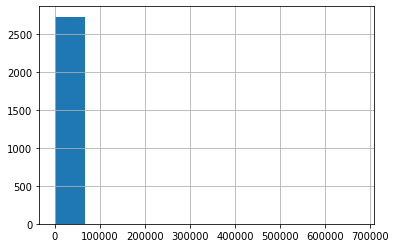

In [ ]:
df.groupby('order_id')['revenue'].sum().sort_values(ascending=False).hist()

In [ ]:
df.groupby('order_id')['revenue'].sum().sort_values(ascending=False).head()

order_id
71743    675000.0
71668     49432.0
69830     47385.0
69156     33680.0
69504     32718.0
Name: revenue, dtype: float64

*Как видно есть один заказ, который более, чем в 10 раз дороже 2го по дороговизне, удалим его также, чтобы не искажать результаты.*

In [ ]:
t = df.groupby('order_id')
df.drop(df[df.index.isin(t.filter(lambda x: x['revenue'].sum() > 500000).index)].index, 
        axis=0, inplace=True)

In [ ]:
np.percentile(df['quantity'], [95,99])

array([ 7., 30.])

In [ ]:
np.percentile(df['revenue'], [95, 99])

array([2849.  , 6148.89])

*В не менее, чем 95% строках, количество заказанных единиц не более 7.*   
*В не менее, чем 95% строках, стоимость не более 2849 р.*

Создадим дополнительный категориальный признак нормальности/аномальности заказа по сумме (в нормальных оставим данные, лежащие в интервале 95% перцентиля).

In [ ]:
orders = pd.DataFrame(df.groupby('order_id')['revenue'].sum().reset_index())

In [ ]:
orders = orders[orders['revenue'] < np.percentile(orders['revenue'], 95)]

In [ ]:
df['is_abnormal'] = ['abnormal' if x in orders.index else 'normal' for x in df.index]

**Выводы:** на этапе предобработки мы привели столбец с датой к формату datetime, создали отдельные столбцы с датой без времени, с временем, с днем недели, кластеризировали товары, удостоверились в отсутствии пропусков, обнаружили ошибки в логировании и отбросили задублированные строки и оставили только строки с самой ранней датой (в общей сложности осталось 97% клиентов и 98% заказов от оригинального датасета), обнаружили "жирные хвосты" в признаках количество единиц и выручке, приняли решение добавить категориальную переменную , характеризующую нормальность выручки по заказу (к нормальным заказам отнесли суммы заказов, входящих в 95 перцентиль).

# Исследовательский анализ<a id=3></a>

## Исследуем ассортимент, определим количество и долю каждой категории

Смотрим на долю и кол-во каждой категории.

In [ ]:
cat_count = df.groupby('cat')['product'].count().reset_index()

val = []
idx = df['cat'].unique()

for cat in df['cat'].unique():
    val.append(round(len(df[df['cat'] == cat]) / len(df),3))

cat_share = pd.DataFrame(index=[idx, val]).reset_index()
cat_share = cat_share.merge(cat_count, left_on='level_0', right_on='cat')
cat_share.drop('cat', axis=1, inplace=True)
cat_share.columns=['category','share','count']
cat_share.sort_values('share', ascending=False)

,category,share,count
0,"Комнатные растения, семена и рассада",0.510,2404
1,Товары для дома и дачи,0.319,1505
3,Ремонт,0.099,468
2,Кухонная утварь,0.071,335


Отобразим на графике.

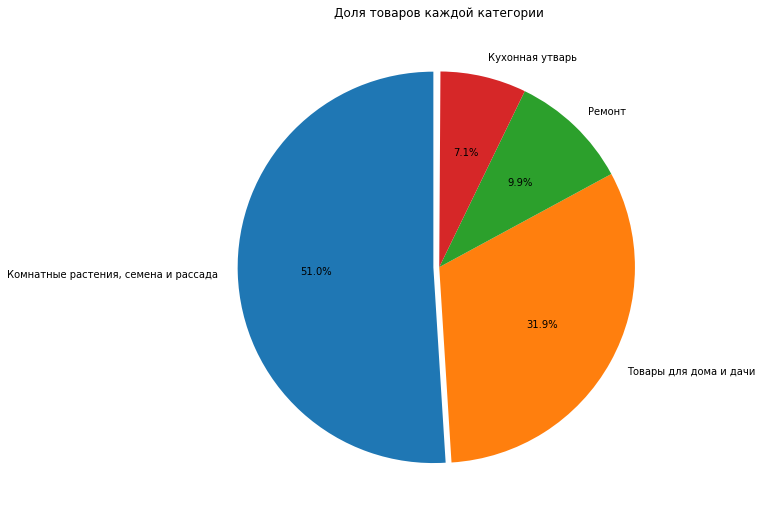

In [ ]:
cat_share = cat_share.groupby('category')['share'].sum().reset_index().sort_values(
    'share', ascending=False)

plt.figure(figsize=(9,9))
plt.title('Доля товаров каждой категории')

y_axis = list(cat_share['share'])
max_val = max(y_axis)
max_index = y_axis.index(max_val)
explode = tuple([0 if i!=max_index else .03 for i in range(len(y_axis))])

x = cat_share['share']
labels = cat_share['category']

plt.pie(x = x, labels = labels, explode = explode, autopct='%.1f%%', startangle=90)
plt.show()

*Большую часть ассортимента представляют комнатные растения, семена, рассада, на втором месте товары для дома и дачи.*

## Определим самые продаваемые и прибыльные категории товаров

In [ ]:
most_selling_volume = df.groupby('cat')['quantity'].sum().sort_values(ascending=False)

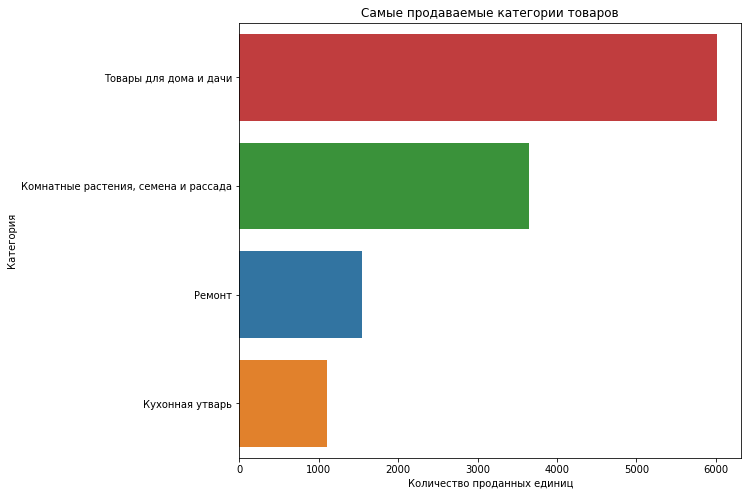

In [ ]:
x = most_selling_volume.values
y = most_selling_volume.index

palette = ['tab:red' if i == 'Товары для дома и дачи' 
           else ('tab:green' if i == 'Комнатные растения, семена и рассада' 
                 else ('tab:blue' if i == 'Ремонт' 
                       else ('tab:orange' if i == 'Кухонная утварь' 
                             else 'black'))) for i in y]

plt.figure(figsize=(9,8))
ax = sns.barplot(x=x, y=y, palette=palette)
ax.set(title = 'Самые продаваемые категории товаров', xlabel='Количество проданных единиц', ylabel='Категория')
plt.show()

*Наибольшей популярностью у покупателей пользуются товары для дома и дачи.*

In [ ]:
most_profitable_cat = df.groupby('cat')['revenue'].sum().sort_values(ascending=False)

In [ ]:
most_profitable_cat

cat
Товары для дома и дачи                  1704403.0
Ремонт                                   921872.0
Комнатные растения, семена и рассада     488248.0
Кухонная утварь                          264514.0
Name: revenue, dtype: float64

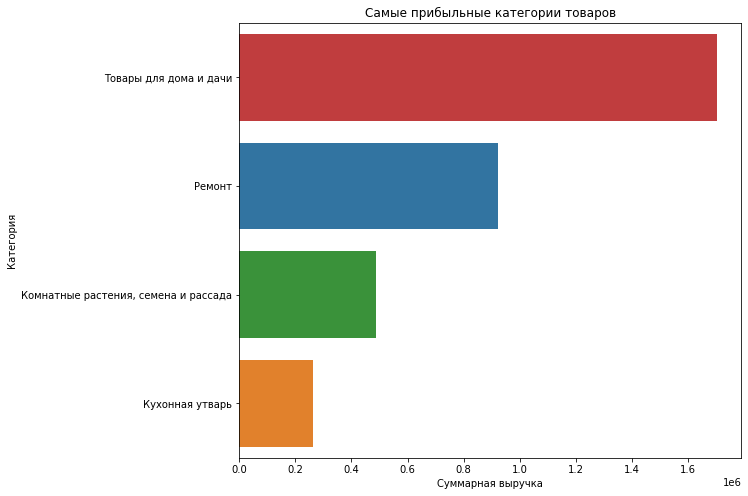

In [ ]:
x = most_profitable_cat.values
y = most_profitable_cat.index

palette = ['tab:red' if i == 'Товары для дома и дачи' 
           else ('tab:green' if i == 'Комнатные растения, семена и рассада' 
                 else ('tab:blue' if i == 'Ремонт' 
                       else ('tab:orange' if i == 'Кухонная утварь' 
                             else 'black'))) for i in y]

plt.figure(figsize=(9,8))
ax = sns.barplot(x=x, y=y, palette=palette)
ax.set(title = 'Самые прибыльные категории товаров', xlabel='Суммарная выручка', ylabel='Категория')
plt.show()

*Наибольшую выручку приносят товары для дома и дачи.*

## Определим средний чек и его динамику

In [ ]:
print('Средний чек для нормальных заказов без учета периода:',
      round(df[df['is_abnormal'] == 'normal']
            .groupby('order_id')['revenue'].sum().mean(),2))

print('Средний чек для аномальных заказов без учета периода:',
      round(df[df['is_abnormal'] == 'abnormal']
            .groupby('order_id')['revenue'].sum().mean(),2))

Средний чек для нормальных заказов без учета периода: 1141.5
Средний чек для аномальных заказов без учета периода: 1295.94


In [ ]:
res = []
for period in df['month'].unique():
    res.append([period, df[(df['month'] == period)&
                           (df['is_abnormal'] == 'abnormal')]
                .groupby('order_id')['revenue'].sum().mean()])

In [ ]:
avg_bill_by_month_abnorm = pd.DataFrame(res).sort_values(0)
avg_bill_by_month_abnorm.columns = ['year_month', 'avg_bill']

In [ ]:
res = []
for period in df['month'].unique():
    res.append([period, df[(df['month'] == period)&
                           (df['is_abnormal'] == 'normal')]
                .groupby('order_id')['revenue'].sum().mean()])

In [ ]:
avg_bill_by_month_norm = pd.DataFrame(res).sort_values(0)
avg_bill_by_month_norm.columns = ['year_month', 'avg_bill']

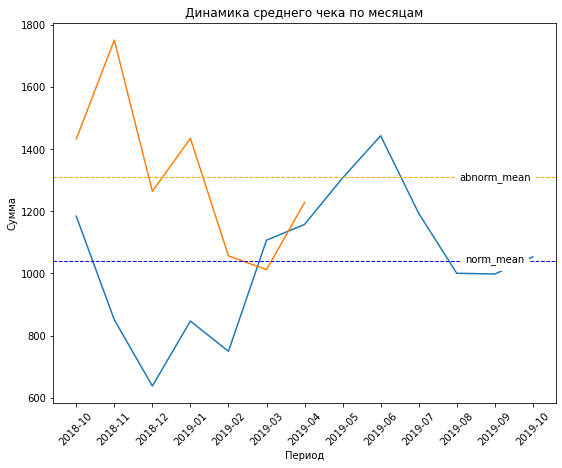

In [ ]:
plt.figure(figsize=(9,7))

x_1 = avg_bill_by_month_norm['year_month'].astype(str)
y_1 = avg_bill_by_month_norm['avg_bill']

x_2 = avg_bill_by_month_abnorm['year_month'].astype(str)
y_2 = avg_bill_by_month_abnorm['avg_bill']

ax_1 = sns.lineplot(x=x_1, y=y_1)
ax_2 = sns.lineplot(x=x_2, y=y_2)
plt.title('Динамика среднего чека по месяцам')
plt.xlabel('Период')
plt.ylabel('Сумма')

plt.axhline(y_1.mean(), c='blue', ls='--', lw=1)
plt.axhline(y_2.mean(), c='orange', ls='--', lw=1)

plt.text(11, y_1.mean(), 'norm_mean', fontsize=10, va='center', ha='center', backgroundcolor='w')
plt.text(11, y_2.mean(), 'abnorm_mean', fontsize=10, va='center', ha='center', backgroundcolor='w')

plt.xticks(rotation=45)
plt.show()

*Средний ежемесячный чек у аномальных заказов на уровне примерно 1300р., у нормальных - 1050р., средний чек по нормальным заказам падал к началу 2019 и начал показывать стабильный рост с февраля, пик - в июне.*

## Определим среднюю выручку с покупателя и ее динамику

In [ ]:
print('Средняя выручка с покупателя для нормальных заказов без учета периода:', 
      round(df[df['is_abnormal'] == 'normal'].
            groupby('customer_id')['revenue'].sum().mean(),2))

print('Средняя выручка с покупателя для аномальных заказов без учета периода:', 
      round(df[df['is_abnormal'] == 'abnormal'].
            groupby('customer_id')['revenue'].sum().mean(),2))

Средняя выручка с покупателя для нормальных заказов без учета периода: 1260.49
Средняя выручка с покупателя для аномальных заказов без учета периода: 1532.35


In [ ]:
res = []
for month in df['month'].unique():
    res.append([month, df[(df[
        'month'] == month)&(df['is_abnormal'] == 'abnormal')]
                                         .groupby('customer_id')['revenue'].sum().mean()])

In [ ]:
monthly_revenue_per_customer_abnorm = pd.DataFrame(res)
monthly_revenue_per_customer_abnorm.columns = ['year_month', 'revenue']

In [ ]:
res = []
for month in df['month'].unique():
    res.append([month, df[(df[
        'month'] == month)&(df['is_abnormal'] == 'normal')]
                                         .groupby('customer_id')['revenue'].sum().mean()])

In [ ]:
monthly_revenue_per_customer_norm = pd.DataFrame(res)
monthly_revenue_per_customer_norm.columns = ['year_month', 'revenue']

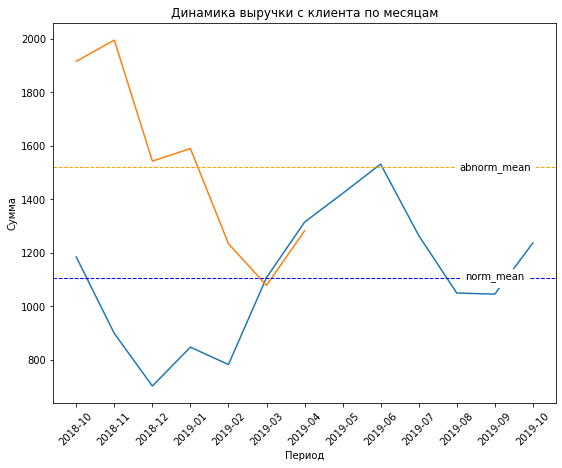

In [ ]:
plt.figure(figsize=(9,7))

x_1 = monthly_revenue_per_customer_norm['year_month'].astype(str)
y_1 = monthly_revenue_per_customer_norm['revenue']

x_2 = monthly_revenue_per_customer_abnorm['year_month'].astype(str)
y_2 = monthly_revenue_per_customer_abnorm['revenue']

ax_1 = sns.lineplot(x=x_1, y=y_1)
ax_2 = sns.lineplot(x=x_2, y=y_2)
plt.title('Динамика выручки с клиента по месяцам')
plt.xlabel('Период')
plt.ylabel('Сумма')

plt.axhline(y_1.mean(), c='blue', ls='--', lw=1)
plt.axhline(y_2.mean(), c='orange', ls='--', lw=1)

plt.text(11, y_1.mean(), 'norm_mean', fontsize=10, va='center', ha='center', backgroundcolor='w')
plt.text(11, y_2.mean(), 'abnorm_mean', fontsize=10, va='center', ha='center', backgroundcolor='w')

plt.xticks(rotation=45)
plt.show()

*Ежемесячная выручка от аномальных заказов порядка 1500р., от нормальных - 1100р., в целом тренд такой же, как и у среднего чека.*

## Определим динамику выручки

In [ ]:
print('Средняя ежемесячная выручка для нормальных заказов без учета периода:', round(
    df[df['is_abnormal'] == 'normal'].groupby('month')['revenue'].sum().mean(),2))

print('Средняя ежемесячная выручка для аномальных заказов без учета периода:', round(
    df[df['is_abnormal'] == 'abnormal'].groupby('month')['revenue'].sum().mean(),2))

Средняя ежемесячная выручка для нормальных заказов без учета периода: 119067.46
Средняя ежемесячная выручка для аномальных заказов без учета периода: 261594.29


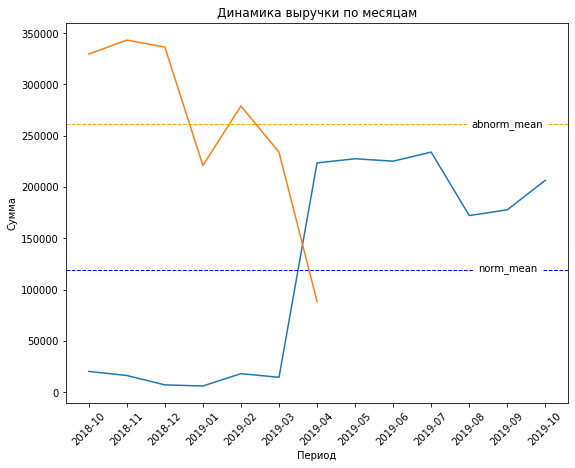

In [ ]:
plt.figure(figsize=(9,7))

x_1 = df[df['is_abnormal'] == 'normal'].groupby('month')['revenue'].sum().index.astype(str)
y_1 = df[df['is_abnormal'] == 'normal'].groupby('month')['revenue'].sum().values

x_2 = df[df['is_abnormal'] == 'abnormal'].groupby('month')['revenue'].sum().index.astype(str)
y_2 = df[df['is_abnormal'] == 'abnormal'].groupby('month')['revenue'].sum().values

ax_1 = sns.lineplot(x=x_1, y=y_1)
ax_2 = sns.lineplot(x=x_2, y=y_2)
plt.title('Динамика выручки по месяцам')
plt.xlabel('Период')
plt.ylabel('Сумма')

plt.axhline(y_1.mean(), c='blue', ls='--', lw=1)
plt.axhline(y_2.mean(), c='orange', ls='--', lw=1)

plt.text(11, y_1.mean(), 'norm_mean', fontsize=10, va='center', ha='center', backgroundcolor='w')
plt.text(11, y_2.mean(), 'abnorm_mean', fontsize=10, va='center', ha='center', backgroundcolor='w')

plt.xticks(rotation=45)
plt.show()

*Выручка для аномальных заказов снижается во времени, а для нормальных распределена равномерно до марта 2019, после чего был резкий более, чем 4х кратный рост вплоть до июня. Можно сказать, что в конце 2018-начале 2019 аномальные заказы компенсировали низкую вырубку нормальных.*

## Определим среднее количество товарных позиций в заказах

In [ ]:
print('Среднее количество артикулов в заказе для нормальных клиентов:', 
      round(df[df['is_abnormal'] == 'normal'].groupby(
    'order_id')['product'].nunique().mean(),2))

print('Среднее количество артикулов в заказе для аномальных клиентов:', 
      round(df[df['is_abnormal'] == 'normal'].groupby(
    'order_id')['product'].nunique().mean(),2))

Среднее количество артикулов в заказе для нормальных клиентов: 1.87
Среднее количество артикулов в заказе для аномальных клиентов: 1.87


In [ ]:
items_in_order = []
for month in df['month'].unique():
    items_in_order.append([month, df[df[
        'month'] == month].groupby('order_id')['product'].nunique().mean()])

In [ ]:
items_in_order = pd.DataFrame(items_in_order)
items_in_order.columns = ['year_month', 'items']

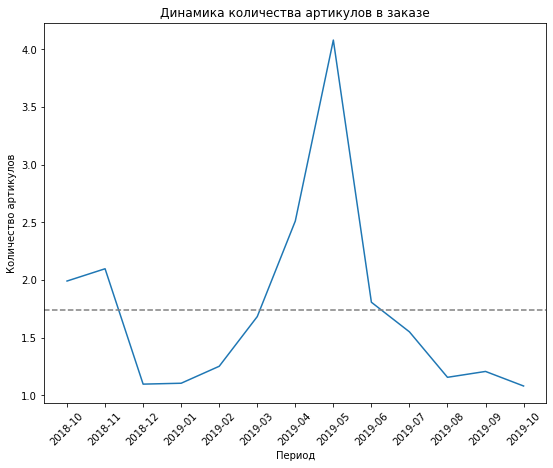

In [ ]:
plt.figure(figsize=(9,7))

x = items_in_order['year_month'].astype(str)
y = items_in_order['items']

ax = sns.lineplot(x=x, y=y)
ax.set_title('Динамика количества артикулов в заказе')
ax.set_xlabel('Период')
ax.set_ylabel('Количество артикулов')
plt.axhline(y.mean(), c='grey', ls='--', lw=1.5)

plt.xticks(rotation=45)
plt.show()

*В среднем в заказе 1-2 артикула, к середине 2019 наблюдается резкий рост до 4 артикулов.*

## Проверим в какое время больше всего заказов

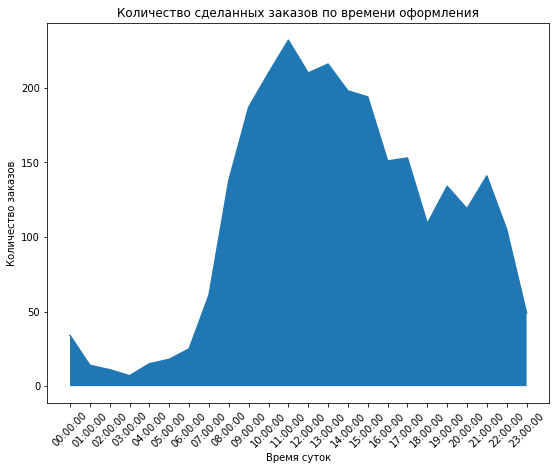

In [ ]:
plt.figure(figsize=(9,7))

x = df.groupby('time')['order_id'].nunique().index.astype(str)
y = df.groupby('time')['order_id'].nunique().values

ax = sns.lineplot(x=x, y=y)
ax.set_title('Количество сделанных заказов по времени оформления')
ax.set_xlabel('Время суток')
ax.set_ylabel('Количество заказов')

plt.fill_between(x, y)
plt.xticks(rotation=45)
plt.show()

*Наибольшее число заказов создаются в утренний/дневной период с 9 до 14 часов.* 

## Проверим в какой день недели больше всего заказов

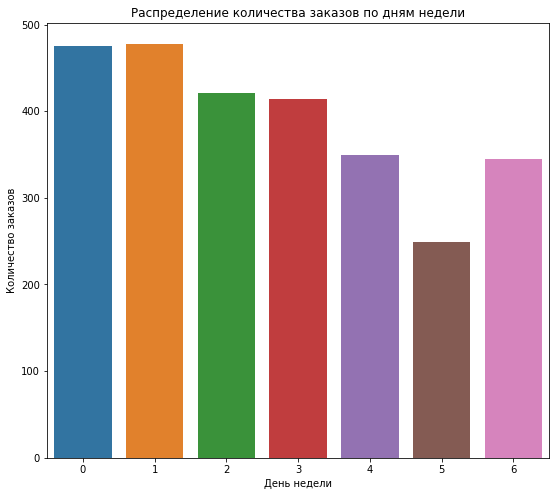

In [ ]:
x = df.groupby('dayofweek')['order_id'].nunique().index
y = df.groupby('dayofweek')['order_id'].nunique().values

plt.figure(figsize=(9,8))
ax = sns.barplot(x=x, y=y)
ax.set(title = 'Распределение количества заказов по дням недели', 
       xlabel='День недели', 
       ylabel='Количество заказов')
plt.show()

*Чаще всего заказывают в начале недели, наименьшее количество заказов в субботу.*

## Посмотрим на распределение количества покупателей по месяцам

In [ ]:
print('Среднее количество клиентов в месяц для аномальных заказов:', round(
    df[df['is_abnormal'] == 'abnormal'].groupby('month')['customer_id'].nunique().mean()))

print('Среднее количество клиентов в месяц для нормальных заказов:', round(
    df[df['is_abnormal'] == 'normal'].groupby('month')['customer_id'].nunique().mean()))

Среднее количество клиентов в месяц для аномальных заказов: 173
Среднее количество клиентов в месяц для нормальных заказов: 96


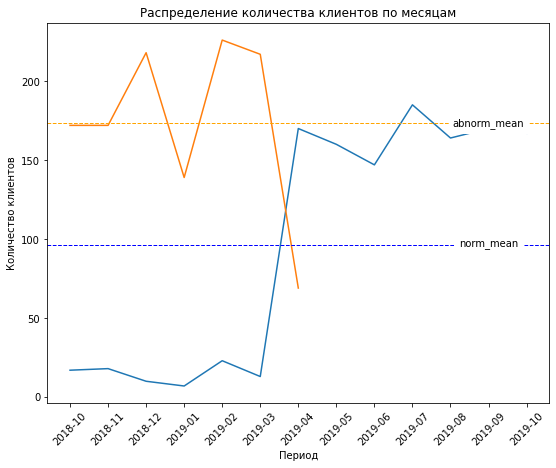

In [ ]:
plt.figure(figsize=(9,7))

x_1 = df[df['is_abnormal'] == 'normal'].groupby('month')['customer_id'].nunique().index.astype(str)
y_1 = df[df['is_abnormal'] == 'normal'].groupby('month')['customer_id'].nunique().values

x_2 = df[df['is_abnormal'] == 'abnormal'].groupby('month')['customer_id'].nunique().index.astype(str)
y_2 = df[df['is_abnormal'] == 'abnormal'].groupby('month')['customer_id'].nunique().values

ax_1 = sns.lineplot(x=x_1, y=y_1)
ax_2 = sns.lineplot(x=x_2, y=y_2)
plt.title('Распределение количества клиентов по месяцам')
plt.xlabel('Период')
plt.ylabel('Количество клиентов')

plt.axhline(y_1.mean(), c='blue', ls='--', lw=1)
plt.axhline(y_2.mean(), c='orange', ls='--', lw=1)

plt.text(11, y_1.mean(), 'norm_mean', fontsize=10, va='center', ha='center', backgroundcolor='w')
plt.text(11, y_2.mean(), 'abnorm_mean', fontsize=10, va='center', ha='center', backgroundcolor='w')

plt.xticks(rotation=45)
plt.show()

*Количество клиентов заметно коррелирует с графиком месячной выручки.*

## Посмотрим на распределение количества заказов по месяцам

In [ ]:
print('Среднее количество заказов в месяц для аномальных клиентов:', round(
    df[df['is_abnormal'] == 'abnormal'].groupby('month')['order_id'].nunique().mean()))

print('Среднее количество заказов в месяц для нормальных клиентов:', round(
    df[df['is_abnormal'] == 'normal'].groupby('month')['order_id'].nunique().mean()))

Среднее количество заказов в месяц для аномальных клиентов: 202
Среднее количество заказов в месяц для нормальных клиентов: 104


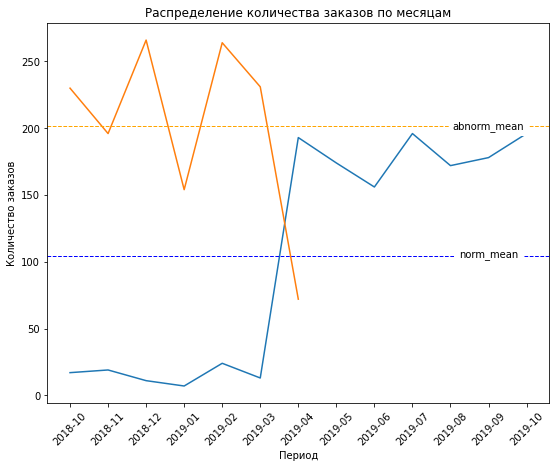

In [ ]:
plt.figure(figsize=(9,7))

x_1 = df[df['is_abnormal'] == 'normal'].groupby('month')['order_id'].nunique().index.astype(str)
y_1 = df[df['is_abnormal'] == 'normal'].groupby('month')['order_id'].nunique().values

x_2 = df[df['is_abnormal'] == 'abnormal'].groupby('month')['order_id'].nunique().index.astype(str)
y_2 = df[df['is_abnormal'] == 'abnormal'].groupby('month')['order_id'].nunique().values

ax_1 = sns.lineplot(x=x_1, y=y_1)
ax_2 = sns.lineplot(x=x_2, y=y_2)
plt.title('Распределение количества заказов по месяцам')
plt.xlabel('Период')
plt.ylabel('Количество заказов')

plt.axhline(y_1.mean(), c='blue', ls='--', lw=1)
plt.axhline(y_2.mean(), c='orange', ls='--', lw=1)

plt.text(11, y_1.mean(), 'norm_mean', fontsize=10, va='center', ha='center', backgroundcolor='w')
plt.text(11, y_2.mean(), 'abnorm_mean', fontsize=10, va='center', ha='center', backgroundcolor='w')

plt.xticks(rotation=45)
plt.show()

*Динамика заказов также коррелирует с графиками по месячному количеству клиентов и выручки.*

**Выводы:** ассортимент магазина на 51% представлен товарами категории Растения, семена, рассада, примерно на 32% Товарами для дома и дачи. В количественном выражении  наибольшей популярностью пользуются Товары для дома и дачи.   
В денежном также.

Мы зарабатываем больше на Ремонте, хотя в количественном эквиваленте продаем больше Растений.

Аномальные заказы распределены во времени в период с октября 2018 по апрель 2019 включительно.

Средний чек за весь период наблюдений - 1141/1295 р. для нормальных/аномальных заказов соответственно, Средний ежемесячный чек у аномальных заказов на уровне примерно 1300р., у нормальных - 1050р. Средний чек по нормальным заказам падал к началу 2019 и начал показывать стабильный рост с февраля, пик - в июне.   

Средняя выручка с покупателя - 1260/1532 р. для нормальных/аномальных заказов соответственно без разбивки по месяцам.   
Ежемесячная выручка от аномальных заказов порядка 1500р., от нормальных - 1100р.

Общая средняя выручка в месяц - 119000/261000 р. для нормальных/аномальных заказов соответственно. Выручка для аномальных заказов снижается во времени, а для нормальных распределена равномерно до марта 2019, после чего был резкий более, чем 4х кратный рост вплоть до июня. Можно сказать, что в конце 2018-начале 2019 аномальные заказы компенсировали низкую вырубку нормальных.  

В целом можно отметить, что примерно до апреля основную часть выручки приносили аномальные заказы (очень дорогие), после апреля ситуация поменялась и аномальные заказы совсем пропали, а нормальные стали генерировать всю выручку.

В среднем клиенты делают заказы на 1-2 позиции, к середине 2019 наблюдается резкий рост до 4 артикулов.  

Наиболее активно клиенты делают заказы в утренне-дневной период с 9 до 14 часов.   

Больше всего делается заказов в начале недели, к концу недели количество заказов падает с минимумом в субботу.   

Среднее количество клиентов в месяц для аномальных заказов: 173
Среднее количество клиентов в месяц для нормальных заказов: 96
Количество клиентов заметно коррелирует с графиком месячной выручки
  
Среднее количество заказов в месяц для аномальных клиентов: 202
Среднее количество заказов в месяц для нормальных клиентов: 104
Динамика заказов также коррелирует с графиками по месячному количеству клиентов и выручки.

# Сегментирование покупателей<a id=4></a>

## По интересующим категориям товаров

In [ ]:
clients_share = []
for cat in df['cat'].unique():
    clients_share.append([cat, 
                          df[df['cat'] == cat][
                              'customer_id'].nunique(),
                          round(df[df['cat'] == cat][
                              'customer_id'].nunique() / df[
                              'customer_id'].nunique(),2),
                df[df['cat'] == cat]['revenue'].sum()])

In [ ]:
clients_share = pd.DataFrame(clients_share)
clients_share.columns = ['cat', 'clients_quantity', 'clients_share', 'revenue']
clients_share.sort_values('clients_share', ascending=False)

,cat,clients_quantity,clients_share,revenue
1,Товары для дома и дачи,1127,0.47,1704403.0
0,"Комнатные растения, семена и рассада",632,0.27,488248.0
3,Ремонт,403,0.17,921872.0
2,Кухонная утварь,259,0.11,264514.0


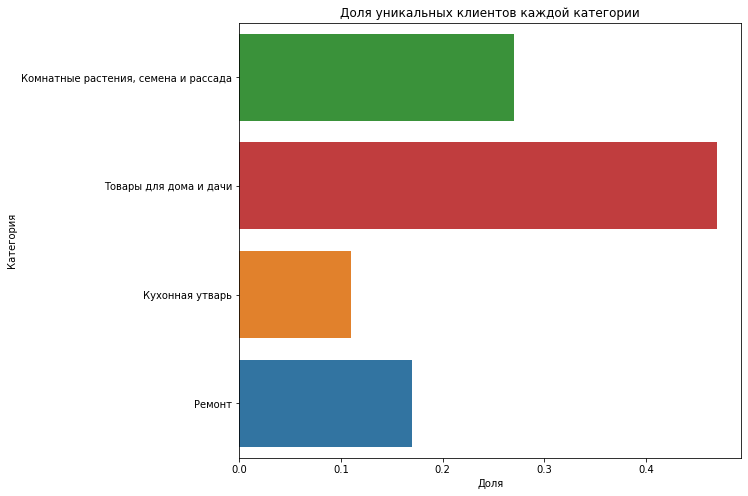

In [ ]:
x = clients_share['clients_share']
y = clients_share['cat']

palette = ['tab:red' if i == 'Товары для дома и дачи' 
           else ('tab:green' if i == 'Комнатные растения, семена и рассада' 
                 else ('tab:blue' if i == 'Ремонт' 
                       else ('tab:orange' if i == 'Кухонная утварь' 
                             else 'black'))) for i in y]

plt.figure(figsize=(9,8))
ax = sns.barplot(x=x, y=y, palette=palette)
ax.set(title = 'Доля уникальных клиентов каждой категории', 
       xlabel='Доля', 
       ylabel='Категория')
plt.show()

Посчитаем динамику кумулятивной выручки по категориям

In [ ]:
cumulative_revenue = df[['month', 'cat', 'revenue']].groupby(['month', 'cat']).sum() \
    .groupby(level=1).cumsum().reset_index()

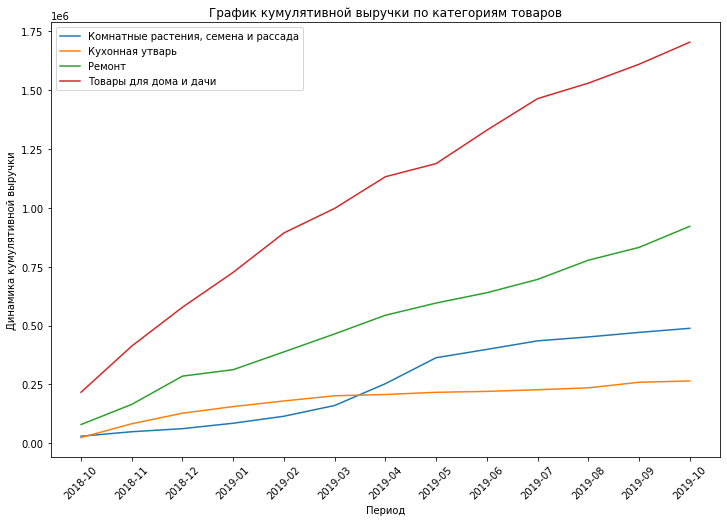

In [ ]:
plt.figure(figsize=(12, 8))

x = cumulative_revenue['month'].astype(str)
y = cumulative_revenue['revenue']
hue = cumulative_revenue['cat']

sns.lineplot(x=x, y=y, hue=hue)

plt.title('График кумулятивной выручки по категориям товаров')
plt.ylabel('Динамика кумулятивной выручки')
plt.xlabel('Период')
plt.xticks(rotation=45)
plt.legend()
plt.show()

*Наилучший прирост выручки показывает категория Товары для дома и дачи, выручка по остальным категориям растет примерно одинаково, категория Ремонт растет чуть лучше. Также отмечаем, заметный прирост выручки по категории Растения в период с марта по май. Вероятно, это связано с весенним сезоном посадки.* 

Посчитаем динамику кумулятивного среднего чека по категориям.

In [ ]:
t = df[['month', 'cat', 'order_id']].groupby(['month', 'cat']) \
    ['order_id'].nunique().reset_index()

In [ ]:
cumulative_avg_bill = df[['month', 'cat', 'revenue']].groupby(
    ['month', 'cat']).sum().reset_index()

cumulative_avg_bill = cumulative_avg_bill.merge(
    t, how='left', left_index=True, right_index=True)

cumulative_avg_bill.drop(['month_y', 'cat_y'], axis=1, inplace=True)
cumulative_avg_bill.columns = ['month', 'cat', 'revenue', 'orders_quantity']
cumulative_avg_bill['avg_bill'] = cumulative_avg_bill['revenue'] / cumulative_avg_bill['orders_quantity']

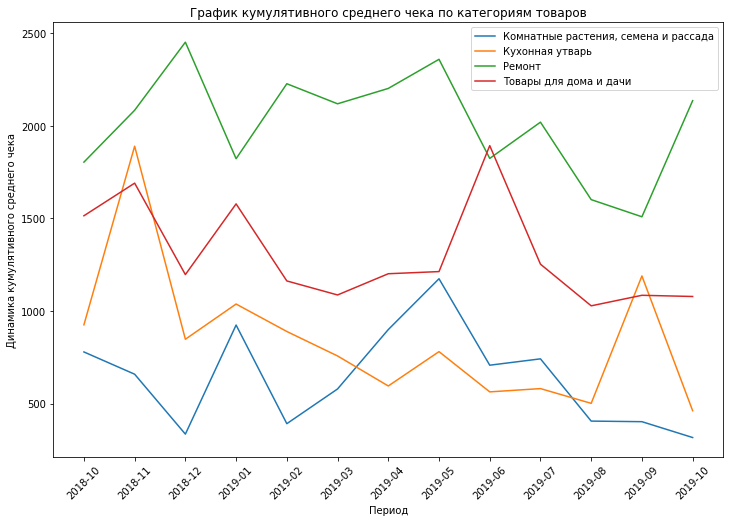

In [ ]:
plt.figure(figsize=(12, 8))

x = cumulative_avg_bill['month'].astype(str)
y = cumulative_avg_bill['avg_bill']
hue = cumulative_avg_bill['cat']

sns.lineplot(x=x, y=y, hue=hue)


plt.title('График кумулятивного среднего чека по категориям товаров')
plt.ylabel('Динамика кумулятивного среднего чека')
plt.xlabel('Период')
plt.xticks(rotation=45)
plt.legend()
plt.show()

*Кумулятивный средний чек по категории Ремонт примерно в 1.5 раза выше остальных категорий, в категории Растения также наблюдается прирост с февраля по май.*

Проверим много ли мультикатегорийных заказов или клиенты приходят конкретно за одной из категорий.

In [ ]:
res = []
for i in df.groupby('order_id')['cat'].nunique():
    if i > 1:
        res.append(i)

In [ ]:
len(res)

25

*Большинство заказов включают только одну категрию товаров.*

**Выводы:**   
1) 27% покупают растения, средний чек и выручка здесь невысокая, самый высокий средний чек в мае, и в целом наблюдается рост среднего чека с февраля, скорее всего, это связано с сезоном посева.    
2) 47% являются клиентами по категории Товары для дома и дачи. Они суммарно тратят больше всех, в основном делают небольшие покупки с невысоким средним чеком, в июне тратили заметно больше, чем в другие месяцы.   
3) 17% покупают инструменты для ремонта, в среднем это самые дорогие заказы, но количество таких заказов невысокое.   
4) 11% покупают товары для кухни. Объем продаж, выручка растет линейно на протяжении всего периода наблюдений. На среднем чеке отражаются всплески активности клиентов в ноябре 2018 и сентябре 2019. В целом, кумулятивный выше, чеи у категории Растения почти на всем интервале, кроме периода с апреля по июль.

## По количеству товаров в заказе

In [ ]:
products_in_order = df.groupby(['customer_id', 'order_id'])['product'].nunique() \
    .reset_index().sort_values('product', ascending=False)

Поскольку мы ранее выяснили, что не менее 95% заказов включают не более 2х артикулов, разобьем на 2 категории: обычные покупатели - 1/2 артикула и покупатели партий > 2 артикулов.

In [ ]:
products_in_order['customer_cat'] = [
    'regular' if x <= 2 else 'wholesale' for x in products_in_order['product']]

Проверим нет ли клиентов, попавших в обе категории.

In [ ]:
t = products_in_order.groupby('customer_id')
t.filter(lambda x: x['customer_cat'].nunique() > 1)['customer_id'].nunique()

14

Удалим дубли, чтобы не искажать выводы.

In [ ]:
products_in_order.drop(
    t.filter(lambda x: x['customer_cat'].nunique() > 1).index, axis=0, inplace=True)

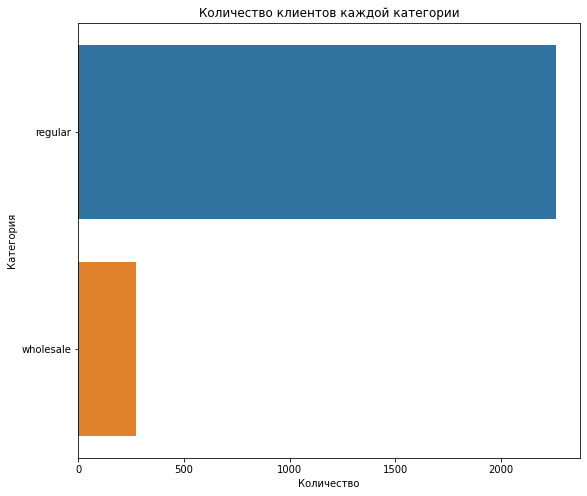

In [ ]:
x = products_in_order.groupby('customer_cat')['order_id'].count().values
y = products_in_order.groupby('customer_cat')['order_id'].count().index

plt.figure(figsize=(9,8))
ax = sns.barplot(x=x, y=y)
ax.set(title = 'Количество клиентов каждой категории', 
       xlabel='Количество', 
       ylabel='Категория')
plt.show()

*Ожидаемо количество обычных клиентов гораздо больше.*

Добавим выручку от каждой категории.

In [ ]:
t = df.groupby(['customer_id', 'order_id'])['revenue'].sum().reset_index()

In [ ]:
t.head()

,customer_id,order_id,revenue
0,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,70290,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,72965,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,69990,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,72796,2324.0


In [ ]:
products_in_order = products_in_order.merge(t[['order_id', 'revenue']], how='left', on='order_id')

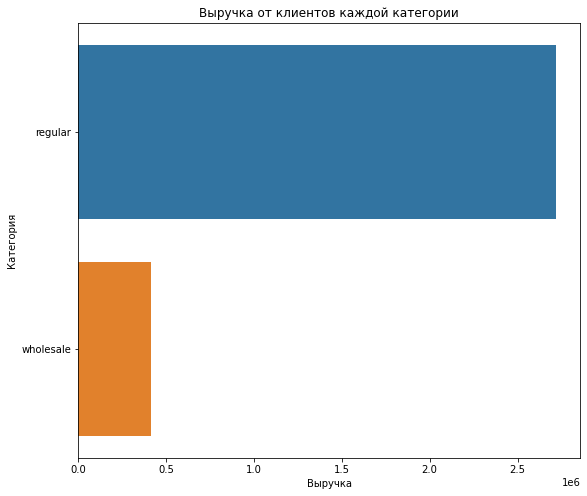

In [ ]:
x = products_in_order.groupby('customer_cat')['revenue'].sum().values
y = products_in_order.groupby('customer_cat')['revenue'].sum().index

plt.figure(figsize=(9,8))
ax = sns.barplot(x=x, y=y)
ax.set(title = 'Выручка от клиентов каждой категории', 
       xlabel='Выручка', 
       ylabel='Категория')
plt.show()

*Выручка примерно отражает количественные пропорции.*

Посмотрим на средний чек по каждой категории клиентов.

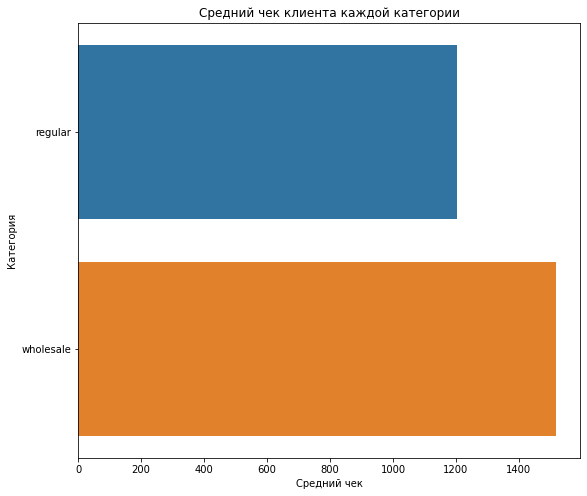

In [ ]:
x = products_in_order.groupby('customer_cat')['revenue'].mean().values
y = products_in_order.groupby('customer_cat')['revenue'].mean().index

plt.figure(figsize=(9,8))
ax = sns.barplot(x=x, y=y)
ax.set(title = 'Средний чек клиента каждой категории', 
       xlabel='Средний чек', 
       ylabel='Категория')

plt.show()

*Средний чек у оптовых клиентов выше. Это значит, что оптовые клиенты приносят разово большую выручку, чем обычные в среднем на 250р. с чека.*

Проверим какие категории товаров предпочитают клиенты каждой группы.

In [ ]:
t = df.groupby('order_id')['cat'].unique().reset_index()

In [ ]:
products_in_order = products_in_order.merge(t, how='left', on='order_id')

In [ ]:
products_in_order['cat'] = products_in_order['cat'].astype(str)

In [ ]:
t = products_in_order.groupby(['customer_cat', 'cat'])[
    'order_id'].count().reset_index().sort_values(['customer_cat', 'order_id'], ascending=False)
t

,customer_cat,cat,order_id
9,wholesale,"['Комнатные растения, семена и рассада']",223
17,wholesale,['Товары для дома и дачи'],22
11,wholesale,['Кухонная утварь'],5
14,wholesale,"['Товары для дома и дачи' 'Комнатные растения, семена и рассада']",5
15,wholesale,['Товары для дома и дачи' 'Кухонная утварь'],4
7,wholesale,"['Комнатные растения, семена и рассада' 'Товары для дома и дачи'\n 'Кухонная утварь']",3
10,wholesale,['Кухонная утварь' 'Товары для дома и дачи'],3
8,wholesale,"['Комнатные растения, семена и рассада' 'Товары для дома и дачи']",2
5,wholesale,"['Комнатные растения, семена и рассада' 'Кухонная утварь']",1
6,wholesale,"['Комнатные растения, семена и рассада' 'Ремонт']",1


In [ ]:
t = t[t['order_id'] > 10]
t.columns = ['customer_cat','cat','order_quantity']

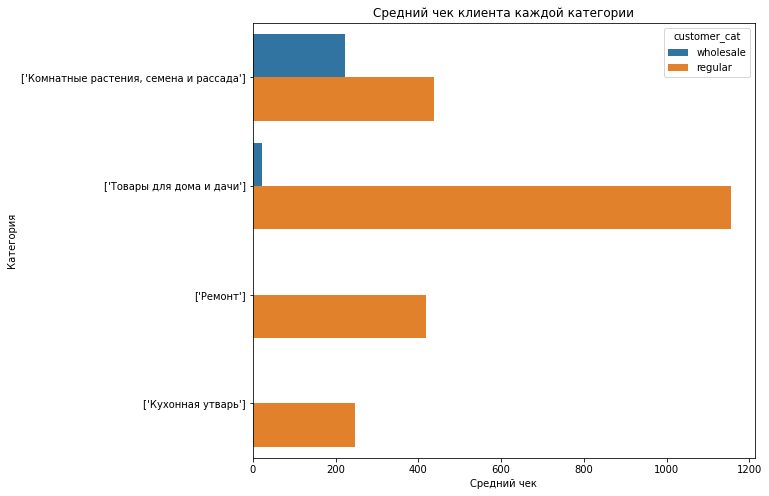

In [ ]:
x = t['order_quantity']
y = t['cat']
hue = t['customer_cat']

plt.figure(figsize=(9,8))
ax = sns.barplot(x=x, y=y, hue=hue)
ax.set(title = 'Средний чек клиента каждой категории', 
       xlabel='Средний чек', 
       ylabel='Категория')
plt.show()

*Рядовые покупатели в основном приходят за Товарами для дома и другими категориями примерно в равной пропорции, а оптовые покупатели приходят в большей степени за Растениями и рассадой. Скорее всего, это какие-то промышленные садоводы.*

Посмотрим вклад каждой категории в ежемесячную выручку.

In [ ]:
revenue_by_customer_cat = df.merge(products_in_order[
    ['customer_id', 'customer_cat']], 
    how='left', 
    on='customer_id')

Снова отбросим 14 клиентов, которые попали сразу в обе категории.

In [ ]:
revenue_by_customer_cat.drop(t[t['customer_cat'].isna()].index, axis=0, inplace=True)

In [ ]:
revenue_by_customer_cat = revenue_by_customer_cat.groupby(
    ['customer_cat', 'month'])['revenue'].sum().reset_index()

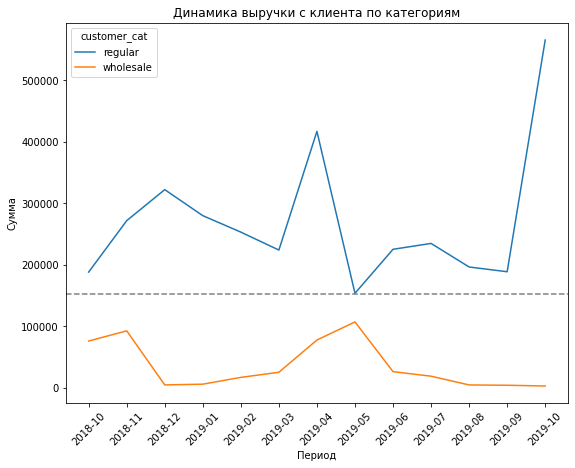

In [ ]:
plt.figure(figsize=(9,7))

x = revenue_by_customer_cat['month'].astype(str)
y = revenue_by_customer_cat['revenue']
hue = revenue_by_customer_cat['customer_cat']

ax = sns.lineplot(x=x, y=y, hue=hue)
ax.set_title('Динамика выручки с клиента по категориям')
ax.set_xlabel('Период')
ax.set_ylabel('Сумма')
plt.axhline(y.mean(), c='grey', ls='--', lw=1.5)

plt.xticks(rotation=45)
plt.show()

*Мы видим, что в среднем регулярные клиенты приносят больше денег, но в отдельные периоды (май) оптовые клиенты за счет больших заказов могут быть близки по месячной выручке.*

**Выводы:** у нас есть 2 категории клиентов: одни (примерно 90% от всех) - регулярные покупатели, приносящие стабильный высокий во времени доход с относительно низким средним чеком. Они в первую очередь покупают Товары для дома.    
И другие - оптовые клиенты, приносящие меньший доход на дистанции, но с высоким средним чеком. Они покупают Растения, рассаду и семена. Очевидно, в мае как раз мы наблюдаем влияние на метрики таких клиентов.

## По возвращаемости (определим период приемлемого возврата - месяц)

Сделаем столбец, отражающий делал ли покупки клиент в этом месяце.

In [ ]:
month_list = df['month'].unique()

res = []
for customer in df['customer_id'].unique():
    sorted = df[df['customer_id'] == customer]
    for x in month_list:
        res.append([customer, x in sorted['month'].unique()])

In [ ]:
active_months = pd.DataFrame(res)
active_months.columns=['customer_id', 'return_rate']
active_months['return_rate'] = active_months['return_rate'] * 1

Добавляем месяцы.

In [ ]:
t = pd.Series((list(month_list)) * active_months['customer_id'].nunique(), 
              name='month')

In [ ]:
active_months = active_months.merge(t, left_index=True, right_index=True)

In [ ]:
active_months = pd.DataFrame(active_months.groupby('customer_id')['return_rate'].mean())

In [ ]:
np.percentile(active_months['return_rate'], 95)

0.07692307692307693

*Не более 95% всех значений не больше 0.07, то есть не более 95% клиентов были с магазином меньше 2 месяцев (поскольку у нас всего 13 месяцев) - это будет первая категория.*

In [ ]:
active_months['return_cat'] = [
    1 if x <= np.percentile(active_months['return_rate'], 95) 
    else 2 for x in active_months['return_rate']]

In [ ]:
active_months = active_months.reset_index()

In [ ]:
active_months.groupby('return_cat')['customer_id'].count()

return_cat
1    2339
2      35
Name: customer_id, dtype: int64

*Всего 35 клиентов были активны 2 месяца и более.*

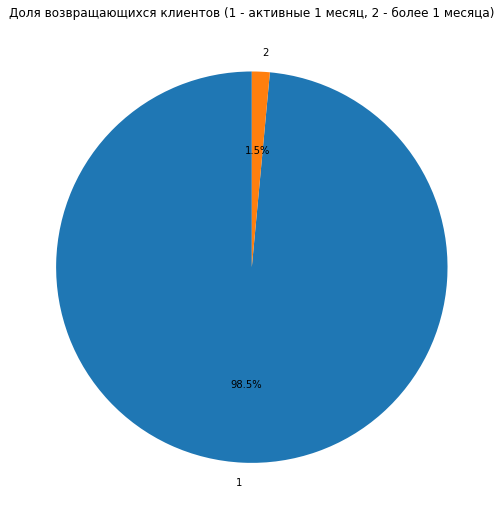

In [ ]:
plt.figure(figsize=(9,9))
plt.title('Доля возвращающихся клиентов (1 - активные 1 месяц, 2 - более 1 месяца)')

x = active_months.groupby('return_cat')['customer_id'].count().values
labels = active_months.groupby('return_cat')['customer_id'].count().index

plt.pie(x = x, labels = labels, autopct='%.1f%%', startangle=90)
plt.show()

**Выводы:** почти все клиенты активны максимум в течение месяца и больше не приходят за новыми покупками.

## по LTV

Разобьем клиентов на когорты = месяцу первой покупки.

In [ ]:
t = df.groupby('customer_id')['dt'].first().dt.to_period('m').reset_index()
t.columns = ['customer_id', 'first_order']

In [ ]:
df = df.merge(t, how='left', left_on='customer_id', right_on='customer_id')

In [ ]:
df['lifetime'] = df['month'].astype(int) - df['first_order'].astype(int)

In [ ]:
df['lifetime'].value_counts()

0    4481
1     112
2      64
4      29
3      17
5       9
Name: lifetime, dtype: int64

*Самый длинный лайфтайм у нас 6 месяцев (до которого добрались лишь 9 человек), поэтому это будет нашим горизонтом анализа.*

Сделаем сводную таблицу по лайфтаймам.

In [ ]:
cohort_revenue = pd.pivot_table(data=df, index='first_order', columns='lifetime', 
                                values='revenue', aggfunc='sum', fill_value=0).cumsum(1)

Удалим строки когорт, которые не прожили 6 месяцев.

In [ ]:
cohort_revenue = cohort_revenue.drop(index=['2019-06', '2019-07', '2019-08', '2019-09',
             '2019-10'], axis=0)

In [ ]:
t = df.groupby('first_order')['customer_id'].nunique()

In [ ]:
cohort_revenue = cohort_revenue.merge(t, how='left', left_on='first_order', right_on='first_order')
cohort_revenue = cohort_revenue.rename(columns={'customer_id':'cohort_size'})

In [ ]:
result = cohort_revenue.div(cohort_revenue['cohort_size'], axis=0)

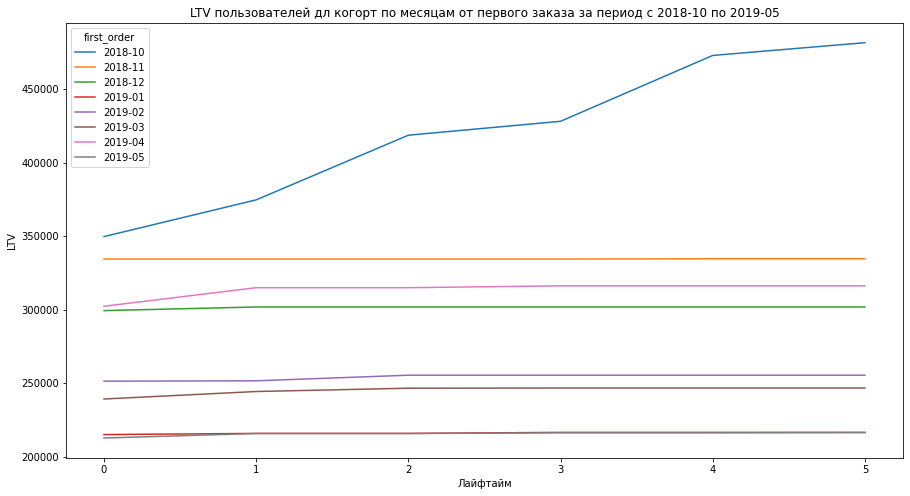

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)

report = cohort_revenue.drop(columns = ['cohort_size'])
report.T.plot(xticks=list(report.columns.values))

plt.title('LTV пользователей дл когорт по месяцам от первого заказа за период с 2018-10 по 2019-05')
plt.ylabel('LTV')
plt.xlabel('Лайфтайм')

plt.show()

plt.rcParams["figure.figsize"] = (6, 4)

**Выводы:** выделяются 2 вида когорт - одни жиут лишь первый месяц после первого заказа, либо делают редкие и маленькие повторные заказы в течение следующих месяцев (таких большинство), выделяется лишь когорта, пришедшая в октябре 2018, здесь покупатели приходили каждый месяц и в какие-то месяцы приносили заметную выручку.

# Формулирование и проверка гипотез<a id=5></a>

## Гипотеза равенства среднего чека между группами

### Группами будут клиенты из исследования про количество товаров в заказе (регулярные клиенты и оптовики)

In [ ]:
group_reg = products_in_order[products_in_order['customer_cat'] == 'regular']['revenue']
group_whol = products_in_order[products_in_order['customer_cat'] == 'wholesale']['revenue']

In [ ]:
def get_distribution(cat):
    st.probplot([np.mean(np.random.choice(cat, size=1000)) 
    for _ in range(10000)], dist="norm", plot=pylab)
    pylab.show()

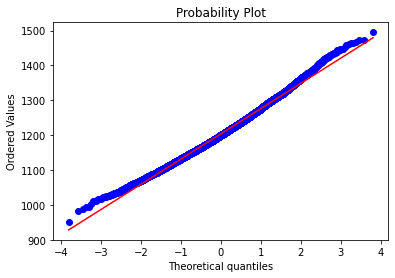

In [ ]:
get_distribution(group_reg)

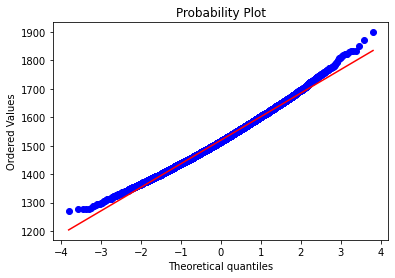

In [ ]:
get_distribution(group_whol)

*Распределение признака похоже на нормальное, но видно, что есть отдельные выбросы, поэтому воспользуемся тестом Шапиро-Уилка для проверки нормальности распределения.*

H0: выборки пришли из нормального распределения   

H1: выборки пришли из не нормального распределения   

Установим уровень значимости - 5%

In [ ]:
print('P-value:',
      f'{st.shapiro([np.mean(np.random.choice(group_reg, size=1000)) for _ in range(10000)])[1]:.10f}')

P-value: 0.0000000000


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
print('P-value:',
      f'{st.shapiro([np.mean(np.random.choice(group_whol, size=1000)) for _ in range(10000)])[1]:.10f}')

P-value: 0.0000000000


*Мы не можем утверждать, что выборки пришли из нормального распределения, поэтому воспользуемся непараметрическим тестом Манна-Уитни.*

Н0 - стат. значимых отличий в среднем чеке нет.

H1 - стат. значимые отличия в среднем чеке есть.

Установим уровень значимости - 5%

In [ ]:
# функция для u критерия
def get_pval_mwtest(cat1, cat2):
    pval = st.mannwhitneyu(cat1, cat2)[1]
    alpha = .05
    
    if pval > alpha:
        print('Не можем отклонить Н0. P-value:','{0:.3f}'.format(pval))
        print(f'Отношение средних чеков:',
                '{0:.3f}'.format(cat1.mean()/cat2.mean()-1))
    else:
        print('Отклоняем Н0. P-value:','{0:.3f}'.format(pval))
        print('Отношение средних чеков:',
                '{0:.3f}'.format(cat1.mean()/cat2.mean()-1))

In [ ]:
get_pval_mwtest(group_whol, group_reg)

Отклоняем Н0. P-value: 0.000
Отношение средних чеков: 0.262


Тест обнаружил стат. значимые различия, отклоняем Н0, средний чек оптовых выше на 26,2%.

Проверим мощность теста на бутстрапе.

In [ ]:
n = 10000
res = []
for _ in tqdm(range(n)):
    whol = np.random.choice(group_whol, size=3000)
    reg = np.random.choice(group_reg, size=3000)
    pval = st.mannwhitneyu(group_whol, group_reg)[1]
    res.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(res)

In [ ]:
(t < 0.05).mean()

1.0

Recall нашего теста 100%.

**Выводы:** нам удалось отклонить нулевую гипотезу с альфа 5%, значит наша классификация отражается в среднем чеке.

### Группами будут клиенты, разделенные по категории товара

In [ ]:
avg_bill_by_cat = df.groupby(['cat','order_id'])['revenue'].sum().reset_index()

Удалим мультикатегорийные заказы.

In [ ]:
t = avg_bill_by_cat.groupby('order_id')
avg_bill_by_cat.drop(t.filter(lambda x: x['cat'].nunique() > 1).index, 
                     axis=0, inplace=True)

In [ ]:
plant_cat_avg_bill = avg_bill_by_cat.query('cat == "Комнатные растения, семена и рассада"')['revenue']
kitchen_cat_avg_bill = avg_bill_by_cat.query('cat == "Кухонная утварь"')['revenue']
tools_cat_avg_bill = avg_bill_by_cat.query('cat == "Ремонт"')['revenue']
household_cat_avg_bill = avg_bill_by_cat.query('cat == "Товары для дома и дачи"')['revenue']

Проверим выборки на нормальность распределения с помощью prob plot.

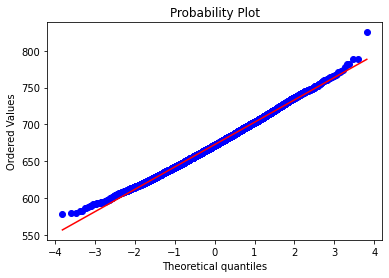

In [ ]:
get_distribution(plant_cat_avg_bill)

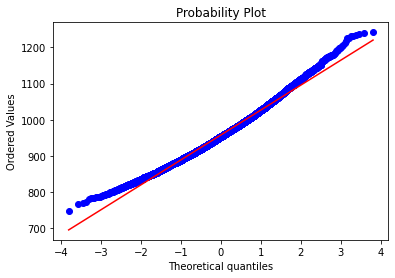

In [ ]:
get_distribution(kitchen_cat_avg_bill)

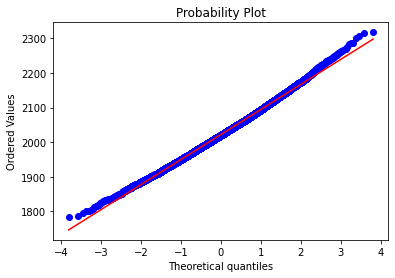

In [ ]:
get_distribution(tools_cat_avg_bill)

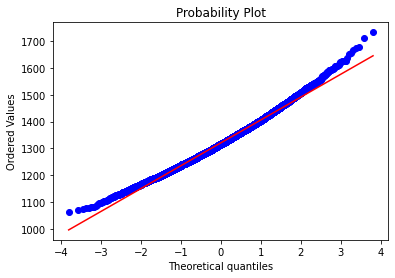

In [ ]:
get_distribution(household_cat_avg_bill)

*Распределение признака снова кажется нормальным, проверим тестом Шапиро-Уилка.*

H0: выборки пришли из нормального распределения   

H1: выборки пришли из не нормального распределения   

Установим уровень значимости - 5%

In [ ]:
print('P-value:',
      f'{st.shapiro([np.mean(np.random.choice(plant_cat_avg_bill, size=1000)) for _ in range(10000)])[1]:.10f}')

P-value: 0.0000000324


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
print('P-value:',
      f'{st.shapiro([np.mean(np.random.choice(kitchen_cat_avg_bill, size=1000)) for _ in range(10000)])[1]:.10f}')

P-value: 0.0000000000


In [ ]:
print('P-value:',
      f'{st.shapiro([np.mean(np.random.choice(tools_cat_avg_bill, size=1000)) for _ in range(10000)])[1]:.10f}')

P-value: 0.0000002175


In [ ]:
print('P-value:',
      f'{st.shapiro([np.mean(np.random.choice(household_cat_avg_bill, size=1000)) for _ in range(10000)])[1]:.10f}')

P-value: 0.0000000000


*Мы не можем утверждать, что выборки пришли из нормального распределения, поэтому воспользуемся непараметрическим тестом Манна-Уитни.*

Н0 - стат. значимых отличий в среднем чеке нет.

H1 - стат. значимые отличия в среднем чеке есть.

Установим уровень значимости - 5%

In [ ]:
get_pval_mwtest(plant_cat_avg_bill, kitchen_cat_avg_bill)

Отклоняем Н0. P-value: 0.000
Отношение средних чеков: -0.296


Мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия.   
Относительный прирост среднего чека покупателей растений к покупателям кухонной утвари составил -29%.

In [ ]:
get_pval_mwtest(plant_cat_avg_bill, tools_cat_avg_bill)

Отклоняем Н0. P-value: 0.000
Отношение средних чеков: -0.667


Мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия.   
Относительный прирост среднего чека покупателей растений к покупателям инструментов составил -66%.

In [ ]:
get_pval_mwtest(plant_cat_avg_bill, household_cat_avg_bill)

Отклоняем Н0. P-value: 0.000
Отношение средних чеков: -0.491


Мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия.   
Относительный прирост среднего чека покупателей растений к покупателям товаров для дома составил -49%.

In [ ]:
get_pval_mwtest(kitchen_cat_avg_bill, tools_cat_avg_bill)

Отклоняем Н0. P-value: 0.000
Отношение средних чеков: -0.527


Мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия.   
Относительный прирост среднего чека покупателей кухонной утвари к покупателям инструментов составил -52%.

In [ ]:
get_pval_mwtest(kitchen_cat_avg_bill, household_cat_avg_bill)

Отклоняем Н0. P-value: 0.002
Отношение средних чеков: -0.276


Мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия.   
Относительный прирост среднего чека покупателей кухонной утвари к покупателям товаров для дома составил -27%.

In [ ]:
get_pval_mwtest(household_cat_avg_bill , tools_cat_avg_bill)

Отклоняем Н0. P-value: 0.000
Отношение средних чеков: -0.347


Мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия.   
Относительный прирост среднего чека покупателей товаров для дома к покупателям инструментов составил -34%.

**Выводы:** мы смогли отклонить все нулевые гипотезы с выбранной альфа 5%, значит, мы можем утрерждать с 95% вероятностью, что наша классификация по товарным предпочтениям отражается в среднем чеке.

## Равная доля возвращаемости или вероятность того, что доля активных месяцев среди всех клиентов не отличается (мера измерения - месяц)

In [ ]:
# воспроизведем снова подсчет возвратов из части сегментирования клиентов
month_list = df['month'].unique()

res = []
for customer in df['customer_id'].unique():
    sorted = df[df['customer_id'] == customer]
    for x in month_list:
        res.append([customer, x in sorted['month'].unique()])

active_months = pd.DataFrame(res)
active_months.columns=['customer_id', 'return_rate']
active_months['return_rate'] = active_months['return_rate'] * 1

t = pd.Series((list(month_list)) * active_months['customer_id'].nunique(), 
              name='month')

active_months = active_months.merge(t, left_index=True, right_index=True)

In [ ]:
# добавим категорию пользователя
active_months = active_months.merge(products_in_order[['customer_id', 'customer_cat']],
                                        how='left', 
                                        left_on='customer_id', right_on='customer_id')

Будем использовать бутстрап для сравнения пропорций.

Н0 - доля возвратов в обеих группах одинаковая.

H1 - доля возвратов в обеих группах различается.

Установим уровень значимости - 5%

In [ ]:
group_whol = active_months[active_months['customer_cat'] == 'wholesale']
group_reg = active_months[active_months['customer_cat'] == 'regular']

In [ ]:
# функция для бутстрапирования
def bootstrap(group_a, group_b):
    n = 100
    res = []
    base_diff = np.abs(group_a.mean() - group_b.mean())
    merged = pd.Series(np.concatenate((group_a,group_b)))

    for _ in range(n):
        subgroup_a = merged.sample(3000)
        subgroup_b = merged.sample(3000)
        diff = np.abs(subgroup_a.mean() - subgroup_b.mean())
        res.append(diff >= base_diff)

    return pd.Series(res).mean()

In [ ]:
n = 1000
result = []
for _ in tqdm(range(n)):
    group_a = np.random.choice(group_whol['return_rate'], size=3000)
    group_b = np.random.choice(group_reg['return_rate'], size=3000)

    pval = bootstrap(group_a, group_b)

    result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

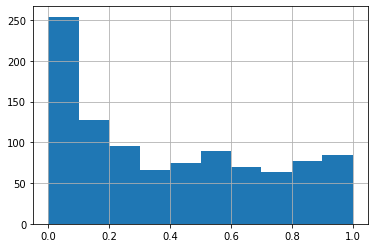

In [ ]:
t.hist()

In [ ]:
pval = t.mean()
alpha = .05

if pval > alpha:
    print('Не можем отклонить Н0. P-value:','{0:.3f}'.format(pval))
else:
    print('Отклоняем Н0. P-value:','{0:.3f}'.format(pval))

Не можем отклонить Н0. P-value: 0.392


Стат. значимые различия не обнаружены.

Проверим z-тестом.

In [ ]:
alpha = .05

res = []

for _ in tqdm(range(10000)):
    a = np.random.choice(group_whol['return_rate'],size=3000)
    b = np.random.choice(group_reg['return_rate'],size=3000)
    pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)], alternative='two-sided')[1]
    res.append(pval)

if pd.Series(res).mean() > alpha:
    print('Не можем отклонить Н0. P-value:','{0:.3f}'.format(pd.Series(res).mean()))
else:
    print('Отклоняем Н0. P-value:','{0:.3f}'.format(pd.Series(res).mean()))

  0%|          | 0/10000 [00:00<?, ?it/s]

Не можем отклонить Н0. P-value: 0.488


Стат. значимых различий не выявлено.

**Выводы:** стат. значимых различий в доле активных клиентов в группах не найдено. 

# Выводы и предложения по увеличению среднего чека для каждой группы пользователей<a id=6></a>

**Общие выводы по проекту:**

1)	На этапе предобработке были обнаружены задублировавшиеся логи:
* заказы с одним номером с разными клиентами
* одинаковые заказы по номеру, клиенту, количеству и цене в разное время
* один номер заказа с разным составом для разных клиентов
* аномальный заказ на 1000 вантузов   
Дубликаты убрали из датасета, осталось 97% клиентов и 98% заказов от оригинального количества.      
Пропусков в данных нет. Были составлены категории товаров на основе описания. Всего сформировано 4 группы товаров.   
Распределение основных признаков: количество товаров в строке и стоимость в строке имеет длинные хвосты. Мы создали дополнительную категориальную переменную, которая делит заказы на **нормальные** и **аномально дорогие** (не входящие в 95% перцентиль).

2)	Более половины ассортимента составляют Растения и рассада, на втором месте – Товары для дома.

3)	Наиболее продаваемая категория в количественном эквиваленте – Товары для дома, затем идут Растения и рассада.

4)	Наиболее прибыльная категория также Товары для дома, примерно в 2 раза отстает категория Ремонт. Растения и рассада только на 3 месте.

5) Аномально дорогие заказы обнаружены в период с октября 2018 по апрель 2019г.

6)	Средний чек за весь представленный период составляет 1141 р (для нормальных заказов / 1295 р для аномальных). Средний ежемесячный чек у аномальных заказов на уровне примерно 1300р., у нормальных - 1050р. В начале года аномально дорогие заказы компенсировали более низкий средний чек нормальных, который к середине года к июню вырос почти в 2 раза.

7)	Средняя выручка с клиента за весь представленный период – 1260 р (для нормальных заказов / 1532 р для аномальных). Ежемесячная выручка от аномальных заказов порядка 1500р., от нормальных - 1100р.

8)	Средняя месячная выручка за весь период примерно 119000/261000 р для нормальных и аномальных заказов соответственно. Выручка для аномальных заказов снижается во времени, а для нормальных распределена равномерно до марта 2019, после чего был резкий более, чем 4х кратный рост вплоть до июня.

9) В целом можно отметить, что примерно до апреля основную часть выручки приносили аномальные заказы (очень дорогие), после апреля ситуация поменялась и аномальные заказы совсем пропали, а нормальные стали генерировать всю выручку.

10)	В среднем в заказе 1-2 артикула. К середине 2019 наблюдается резкий рост до 4 артикулов.

11)	Наибольшее число заказов создаются в утренний/дневной период с 9 до 14 часов.

12)	Чаще всего заказывают в начале недели, наименьшее количество заказов в субботу.

13)	Среднее количество клиентов в месяц для аномальных заказов: 173. Среднее количество клиентов в месяц для нормальных заказов: 96. Количество клиентов заметно коррелирует с графиком месячной выручки.

14)	Среднее количество заказов в месяц для аномальных клиентов: 202. Среднее количество заказов в месяц для нормальных клиентов: 104. Динамика заказов также коррелирует с графиками по месячному количеству клиентов и выручки.

15)	Сегментировали клиентов по интересующим их категориям товаров. Наибольшая доля всех клиентов интересуется категорией Товары для дома (47%). На 2 месте идет категория Растений и рассады (27%).

16)	Наибольший прирост выручки в категории Товары для дома, категория Ремонт на 2 месте, Растения и рассада растет медленно, но скорость прироста с марта по июнь 2019 сравнима с Товарами для дома. Вероятно, это связано с весенним сезоном посадки. Наибольший кумулятивный средний чек в Ремонте. В Растениях резкий рост среднего чека с апреля/мая до июня.

17)	Выделили 2 сегмента клиентов по количеству тваров в заказа (условно обозначили их как регулярных и оптовых клиентов). Регулярные клиенты составляют большинство, около 90%, приносят на дистанции больше денег, как мы ранее определили, их корзина обычно состоит из 1-2 артикулов. Общая выручка выражет примерно те же пропорции. Однако средний чек у оптовых клиентов выше примерно на 250 р.

18)	Регулярным клиентам больше всего интересна категория товаров – Товары для дома и остальные категории примерно в равной степени. Оптовым больше всего интересны Растения и рассада. Таким образом, можно полагать, что это люди занимающиеся разведением растений в больших масштабах. На коротком отрезке времени они также могут быть достаточно прибыльными (май-июнь 2019).

19)	Обнаружили, что большинство клиентов (98%) активны только в первый месяц и больше не возвращаются за новыми покупками.

20)	Мы разбили всех клиентов на когорты – месяц первого заказа и посчитали LTV каждой когорты. Поскольку у нас данные за 13 месяцев, у нас получилось 8 когорт по 6 месяцев. График динамики LTV подтвердил, что большая часть когорт приносят прибыль только в первый месяц. Выделяется одна когорта октября 2018. В ней активность клиентов сохраняется все 6 месяцев. 

21)	Для всех гипотез задали уровень значимости – 5%.   
Первая гипотеза - мы предположили, что средний чек между регулярными и оптовыми клиентами одинаковый. При проверке гипотезы мы использовали непараметрический тест Манна-Уитни, поскольку признак для выборки регулярных клиентов имеет не нормальное распределение. Дополнительно провели t-тест, логарифмировав данные. В обоих случаях нам удалось отклонить нулевую гипотезу, тесты нашли статистически значимую разницу в средних выборок. Recall составил 100%. 

22)	Вторая гипотеза – мы предположили, что средний чек между группами клиентов, разделенных по предпочитаемым категориям товаров одинаковый. Здесь мы использовали тест Манна-Уитни. Мы также смогли отклонить все нулевые гипотезы, значит разделение клиентов по их товарным предпочтениям имеет смысл.

21)	Третья гипотеза – мы предположили, что доля клиентов, совершающий повторный заказ в группах регулярных и оптовых клиентов не отличается. Мы использовали метод бустрапирования, а также, z-тест для пропорций. Оба теста не позволили нам отклонить нулевую гипотезу, а значит, стат. значимой разницы между группами в удержании клиентов нет.

**Бизнес рекомендации:**

1)  Наибольшая проблема видится в крайне плохой доле возвратов клиентов. Оптовых клиентов любителей растений и рассады, которые наиболее активны в весенний период, можно сделать, например, предложение о скидке на повторный заказ из другой категории товаров.

2)  Категория товаров Ремонт представляется неплохой точкой роста, несмотря на небольшой ассортимент и количество заказов, эта категория генерирует больше выручки, чем все категории, кроме Товаров для дома и сада. Возможно следует рассмотреть расширение ассортимента этой категории или предлагать ее в рамках какой-то промо акции, чтобы увеличить продажи.

3)  Самая популярная категория – Товары для дома и сада имеют самые лучшие показатели по выручке и спросу, можно сделать дополнительный упор на рекламу, чтобы увеличить клиентскую базу, а также продумать стратегию увеличения среднего чека, например, попробовать способ кросс-сейла.

4)  В октябре был пик сразу по нескольким показателям, можно сказать, это самый удачный период магазина - самый высокий средний чек и месячная выручка, при этом количество клиентов и заказов не сильно отличаются от среднего за весь период. Что-то побудило клиентов делать более крупные покупки в этот месяц. Нужно посмотреть не проводились ли какие-либо промо акции и возможно применить этот опыт в будущем.
